In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
from sklearn.tree import DecisionTreeClassifier

In [3]:
from sklearn import metrics

In [4]:
from sklearn.metrics import classification_report
from sklearn import metrics

In [5]:
zhytomyr_data = pd.read_csv('reg6_zhytomyr.csv')
zhytomyr_data.head(5)

,Unnamed: 0,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_snow,day_windgust,...,date,time,day_of_week,alarm_last_2hours,alarm_last_3hours,alarm_last_4hours,alarm_in_vinnytsia,alarm_in_kyiv,alarm_in_rivne,alarm_in_khmelnytskyi
0,129196,5.5,1.5,3.3,0.2,80.8,0.8,4.17,0.0,25.9,...,2022-02-24,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,129197,5.5,1.5,3.3,0.2,80.8,0.8,4.17,0.0,25.9,...,2022-02-24,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,129198,5.5,1.5,3.3,0.2,80.8,0.8,4.17,0.0,25.9,...,2022-02-24,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,129199,5.5,1.5,3.3,0.2,80.8,0.8,4.17,0.0,25.9,...,2022-02-24,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,129200,5.5,1.5,3.3,0.2,80.8,0.8,4.17,0.0,25.9,...,2022-02-24,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
zhytomyr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7943 entries, 0 to 7942
Data columns (total 49 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             7943 non-null   int64  
 1   day_tempmax            7943 non-null   float64
 2   day_tempmin            7943 non-null   float64
 3   day_temp               7943 non-null   float64
 4   day_dew                7943 non-null   float64
 5   day_humidity           7943 non-null   float64
 6   day_precip             7943 non-null   float64
 7   day_precipcover        7943 non-null   float64
 8   day_snow               7943 non-null   float64
 9   day_windgust           7943 non-null   float64
 10  day_windspeed          7943 non-null   float64
 11  day_winddir            7943 non-null   float64
 12  day_pressure           7943 non-null   float64
 13  day_cloudcover         7943 non-null   float64
 14  day_visibility         7943 non-null   float64
 15  day_

In [7]:
isw_data = pd.read_csv('isw_report.csv')
isw_data.head()

,Unnamed: 0,date,title,full_url,main_html,main_text,lemmatized_text,tf-idf,sorted tf-idf
0,0,2022-02-24,Russia-Ukraine Warning Update: Initial Russian...,/backgrounder/russia-ukraine-warning-update-in...,"<div class=""field field-name-body field-type-t...","Mason Clark, George Barros, and Kateryna Step...","['mason', 'clark', 'george', 'barros', 'katery...","{'abachev': 0, 'abandon': 0, 'abandoned': 0, '...","{'russian': 0.40944833180236245, 'force': 0.38..."
1,1,2022-02-25,Russia-Ukraine Warning Update: Russian Offensi...,/backgrounder/russia-ukraine-warning-update-ru...,"<div class=""field field-name-body field-type-t...","Mason Clark, George Barros, and Kateryna Stepa...","['mason', 'clark', 'george', 'barros', 'katery...","{'abachev': 0, 'abandon': 0.028449952800024533...","{'force': 0.4154198758637278, 'russian': 0.395..."
2,2,2022-02-26,Russia-Ukraine Warning Update: Russian Offensi...,/backgrounder/russia-ukraine-warning-update-ru...,"<div class=""field field-name-body field-type-t...","Mason Clark, George Barros, and Katya Stepanen...","['mason', 'clark', 'george', 'barros', 'katya'...","{'abachev': 0, 'abandon': 0.0206133346198782, ...","{'force': 0.41779392480185634, 'russian': 0.40..."
3,3,2022-02-27,Russia-Ukraine Warning Update: Russian Offensi...,/backgrounder/russia-ukraine-warning-update-ru...,"<div class=""field field-name-body field-type-t...","Mason Clark, George Barros, and Kateryna Stepa...","['mason', 'clark', 'george', 'barros', 'katery...","{'abachev': 0, 'abandon': 0, 'abandoned': 0, '...","{'force': 0.42608199344801345, 'russian': 0.39..."
4,4,2022-02-28,"Russian Offensive Campaign Assessment, Februar...",/backgrounder/russian-offensive-campaign-asses...,"<div class=""field field-name-body field-type-t...","Mason Clark, George Barros, and Kateryna Step...","['mason', 'clark', 'george', 'barros', 'katery...","{'abachev': 0, 'abandon': 0, 'abandoned': 0, '...","{'february': 0.47719693783492917, 'russian': 0..."


<b>Transform our tf-idf to dataframe and after that merge this data with zhytomyr dataframe</b>

In [8]:
vectorizer = TfidfVectorizer(max_features=400)

In [9]:
X = vectorizer.fit_transform(isw_data['lemmatized_text'])

In [10]:
feature_names = vectorizer.get_feature_names_out()

In [11]:
tfidf_data = pd.DataFrame(X.toarray(), columns=feature_names)
tfidf_data.head()

,across,action,activity,additional,additionally,administration,administrative,advance,affect,air,...,west,western,withdraw,withdrawal,within,without,would,zaporizhia,zaporizhzhia,znpp
0,0.015719,0.000000,0.0,0.027474,0.027023,0.0,0.0,0.125395,0.0,0.151610,...,0.031219,0.066306,0.000000,0.020069,0.000000,0.000000,0.012225,0.000000,0.0,0.0
1,0.000000,0.000000,0.0,0.021419,0.000000,0.0,0.0,0.097756,0.0,0.072734,...,0.048675,0.051691,0.011265,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2,0.008591,0.008622,0.0,0.022525,0.029540,0.0,0.0,0.147618,0.0,0.050994,...,0.051189,0.036241,0.015795,0.010969,0.018480,0.000000,0.020046,0.000000,0.0,0.0
3,0.007920,0.007948,0.0,0.069212,0.040845,0.0,0.0,0.131215,0.0,0.076386,...,0.062915,0.047724,0.021840,0.000000,0.000000,0.012241,0.018478,0.000000,0.0,0.0
4,0.000000,0.008614,0.0,0.075008,0.029511,0.0,0.0,0.110603,0.0,0.108254,...,0.034092,0.087926,0.007890,0.000000,0.006154,0.000000,0.026701,0.030205,0.0,0.0


In [12]:
tfidf_data.shape

(330, 400)

In [13]:
tfidf_data['date'] = isw_data['date']

In [14]:
tfidf_data.head()

,across,action,activity,additional,additionally,administration,administrative,advance,affect,air,...,western,withdraw,withdrawal,within,without,would,zaporizhia,zaporizhzhia,znpp,date
0,0.015719,0.000000,0.0,0.027474,0.027023,0.0,0.0,0.125395,0.0,0.151610,...,0.066306,0.000000,0.020069,0.000000,0.000000,0.012225,0.000000,0.0,0.0,2022-02-24
1,0.000000,0.000000,0.0,0.021419,0.000000,0.0,0.0,0.097756,0.0,0.072734,...,0.051691,0.011265,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2022-02-25
2,0.008591,0.008622,0.0,0.022525,0.029540,0.0,0.0,0.147618,0.0,0.050994,...,0.036241,0.015795,0.010969,0.018480,0.000000,0.020046,0.000000,0.0,0.0,2022-02-26
3,0.007920,0.007948,0.0,0.069212,0.040845,0.0,0.0,0.131215,0.0,0.076386,...,0.047724,0.021840,0.000000,0.000000,0.012241,0.018478,0.000000,0.0,0.0,2022-02-27
4,0.000000,0.008614,0.0,0.075008,0.029511,0.0,0.0,0.110603,0.0,0.108254,...,0.087926,0.007890,0.000000,0.006154,0.000000,0.026701,0.030205,0.0,0.0,2022-02-28


In [15]:
train_zhytomyr = pd.merge(zhytomyr_data, tfidf_data, on='date', how='inner')
train_zhytomyr.head()

,Unnamed: 0,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_snow,day_windgust,...,west,western,withdraw,withdrawal,within,without,would,zaporizhia,zaporizhzhia,znpp
0,129196,5.5,1.5,3.3,0.2,80.8,0.8,4.17,0.0,25.9,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0
1,129197,5.5,1.5,3.3,0.2,80.8,0.8,4.17,0.0,25.9,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0
2,129198,5.5,1.5,3.3,0.2,80.8,0.8,4.17,0.0,25.9,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0
3,129199,5.5,1.5,3.3,0.2,80.8,0.8,4.17,0.0,25.9,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0
4,129200,5.5,1.5,3.3,0.2,80.8,0.8,4.17,0.0,25.9,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0


In [16]:
print(train_zhytomyr.columns)

Index(['Unnamed: 0', 'day_tempmax', 'day_tempmin', 'day_temp', 'day_dew',
       'day_humidity', 'day_precip', 'day_precipcover', 'day_snow',
       'day_windgust',
       ...
       'west', 'western', 'withdraw', 'withdrawal', 'within', 'without',
       'would', 'zaporizhia', 'zaporizhzhia', 'znpp'],
      dtype='object', length=449)


In [17]:
train_zhytomyr['date'] = pd.to_datetime(train_zhytomyr['datetime_combined'])

In [18]:
train_zhytomyr.set_index('datetime_combined', inplace=True)
train_zhytomyr.shape

(7799, 448)

In [19]:
columns_delete = ['Unnamed: 0', 'region_id_x', 'tf-idf', 'date']
train_zhytomyr.drop(columns=columns_delete, inplace=True)
train_zhytomyr.shape

(7799, 444)

In [20]:
train_zhytomyr.columns

Index(['day_tempmax', 'day_tempmin', 'day_temp', 'day_dew', 'day_humidity',
       'day_precip', 'day_precipcover', 'day_snow', 'day_windgust',
       'day_windspeed',
       ...
       'west', 'western', 'withdraw', 'withdrawal', 'within', 'without',
       'would', 'zaporizhia', 'zaporizhzhia', 'znpp'],
      dtype='object', length=444)

In [21]:
X = train_zhytomyr.drop(columns=['alarm'])
y = train_zhytomyr['alarm']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

In [24]:
y_pred = clf.predict(X_test)

In [25]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9465811965811965


In [26]:
target_names = ['alert', 'no alert']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       alert       0.96      0.97      0.97      1863
    no alert       0.88      0.86      0.87       477

    accuracy                           0.95      2340
   macro avg       0.92      0.91      0.92      2340
weighted avg       0.95      0.95      0.95      2340



In [27]:
coeficients = clf.feature_importances_

In [28]:
coef_indexes = np.argsort(np.abs(coeficients))[::-1][:20]

In [29]:
features_names = train_zhytomyr.columns.tolist()

In [30]:
features_data = pd.DataFrame({'top 20 features': [features_names[i] for i in coef_indexes],
                             'coeficient': [coeficients[i] for i in coef_indexes]})

In [31]:
features_data.set_index('top 20 features', inplace=True)

<Axes: ylabel='top 20 features'>

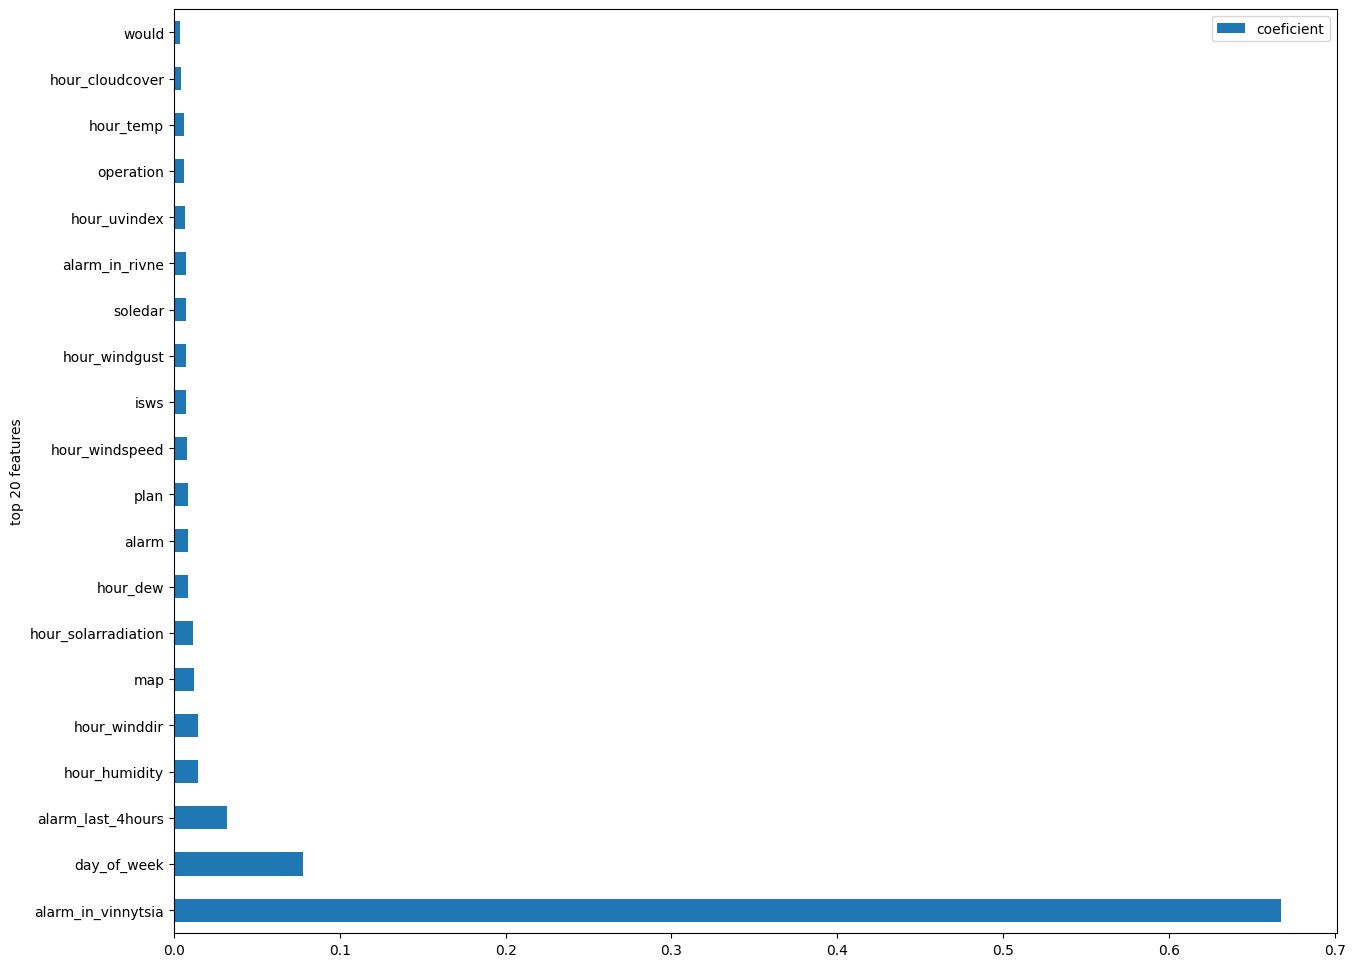

In [32]:
features_data.plot.barh(figsize=(15,12))

In [33]:
train_zhytomyr1 = train_zhytomyr.drop(columns=['alarm_in_khmelnytskyi', 'alarm_in_kyiv', 'alarm_in_rivne', 'alarm_in_vinnytsia'])

In [34]:
train_zhytomyr1.shape

(7799, 440)

In [35]:
X1 = train_zhytomyr1.drop(columns=['alarm'])
y1 = train_zhytomyr1['alarm']

In [36]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=42)

In [37]:
clf1 = DecisionTreeClassifier()
clf1 = clf1.fit(X_train1, y_train1)

In [38]:
y_pred1 = clf1.predict(X_test1)

In [39]:
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))

Accuracy: 0.8393162393162393


In [40]:
train_zhytomyr_without_alert1 = train_zhytomyr1.drop(columns=['alarm'])

In [41]:
coeficients1 = clf1.feature_importances_
coef_indexes1 = np.argsort(np.abs(coeficients1))[::-1][:20]
features_names1 = train_zhytomyr_without_alert1.columns.tolist()

In [42]:
features_data1 = pd.DataFrame({'top 20 features': [features_names1[i] for i in coef_indexes1],
                             'coeficient': [coeficients1[i] for i in coef_indexes1]})

In [43]:
features_data1.set_index('top 20 features', inplace=True)

<Axes: ylabel='top 20 features'>

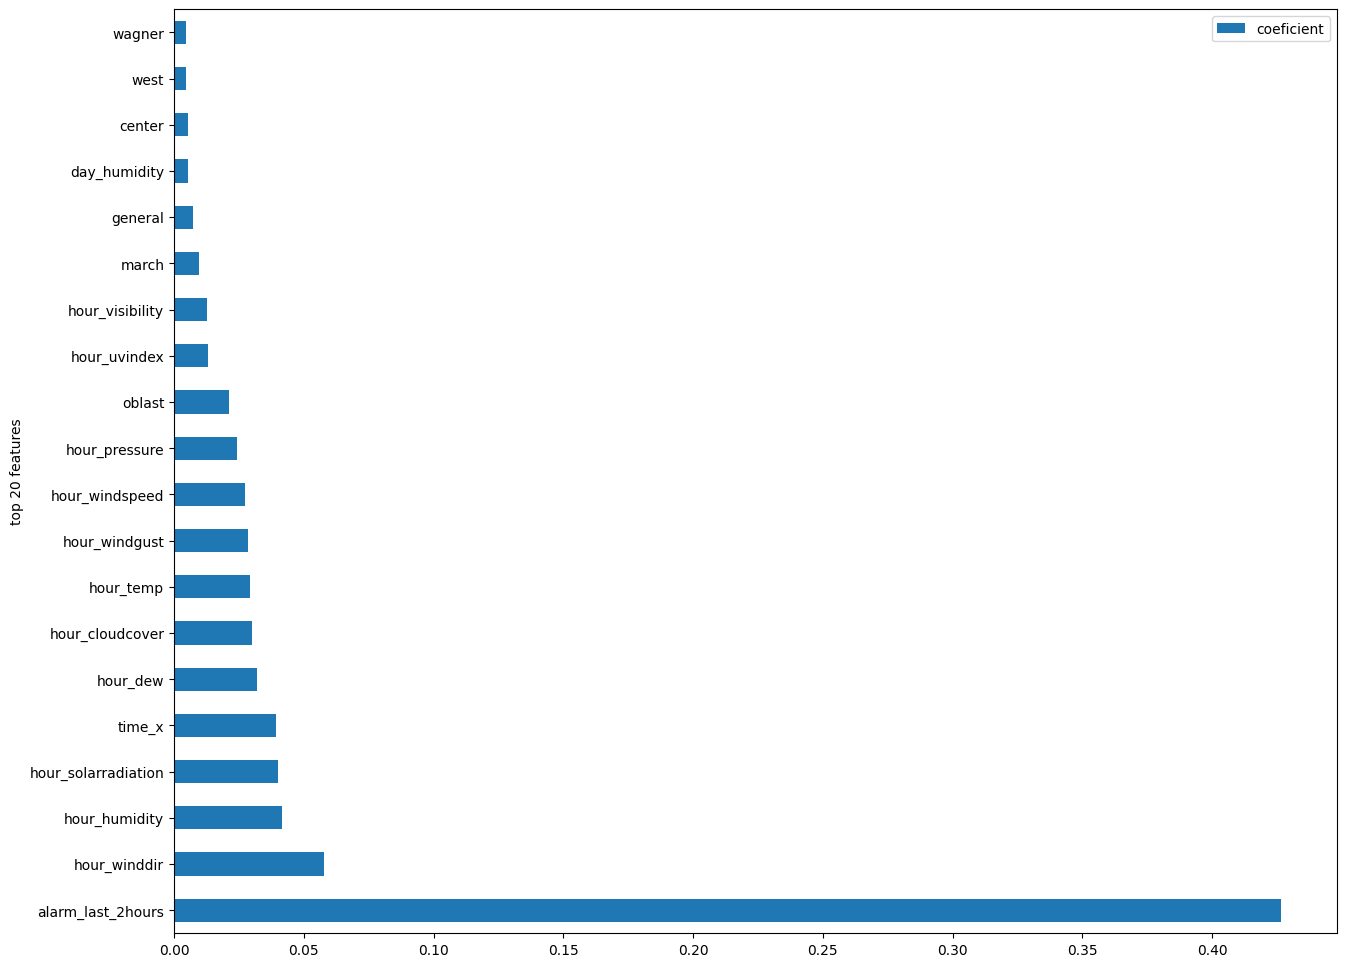

In [44]:
features_data1.plot.barh(figsize=(15,12))

In [45]:
train_zhytomyr2 = train_zhytomyr1.drop(columns=['alarm_last_2hours', 'alarm_last_3hours', 'alarm_last_4hours'])

In [46]:
X2 = train_zhytomyr2.drop(columns=['alarm'])
y2 = train_zhytomyr2['alarm']

In [47]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=42)

In [48]:
clf2 = DecisionTreeClassifier()
clf2 = clf2.fit(X_train2, y_train2)

In [49]:
y_pred2 = clf2.predict(X_test2)

In [50]:
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred2))

Accuracy: 0.8551282051282051


In [51]:
train_zhytomyr_without_alert2 = train_zhytomyr2.drop(columns=['alarm'])

In [52]:
coeficients2 = clf2.feature_importances_
coef_indexes2 = np.argsort(np.abs(coeficients2))[::-1][:20]
features_names2 = train_zhytomyr_without_alert2.columns.tolist()

In [53]:
features_data2 = pd.DataFrame({'top 20 features': [features_names2[i] for i in coef_indexes2],
                             'coeficient': [coeficients2[i] for i in coef_indexes2]})

In [54]:
features_data2.set_index('top 20 features', inplace=True)

<Axes: ylabel='top 20 features'>

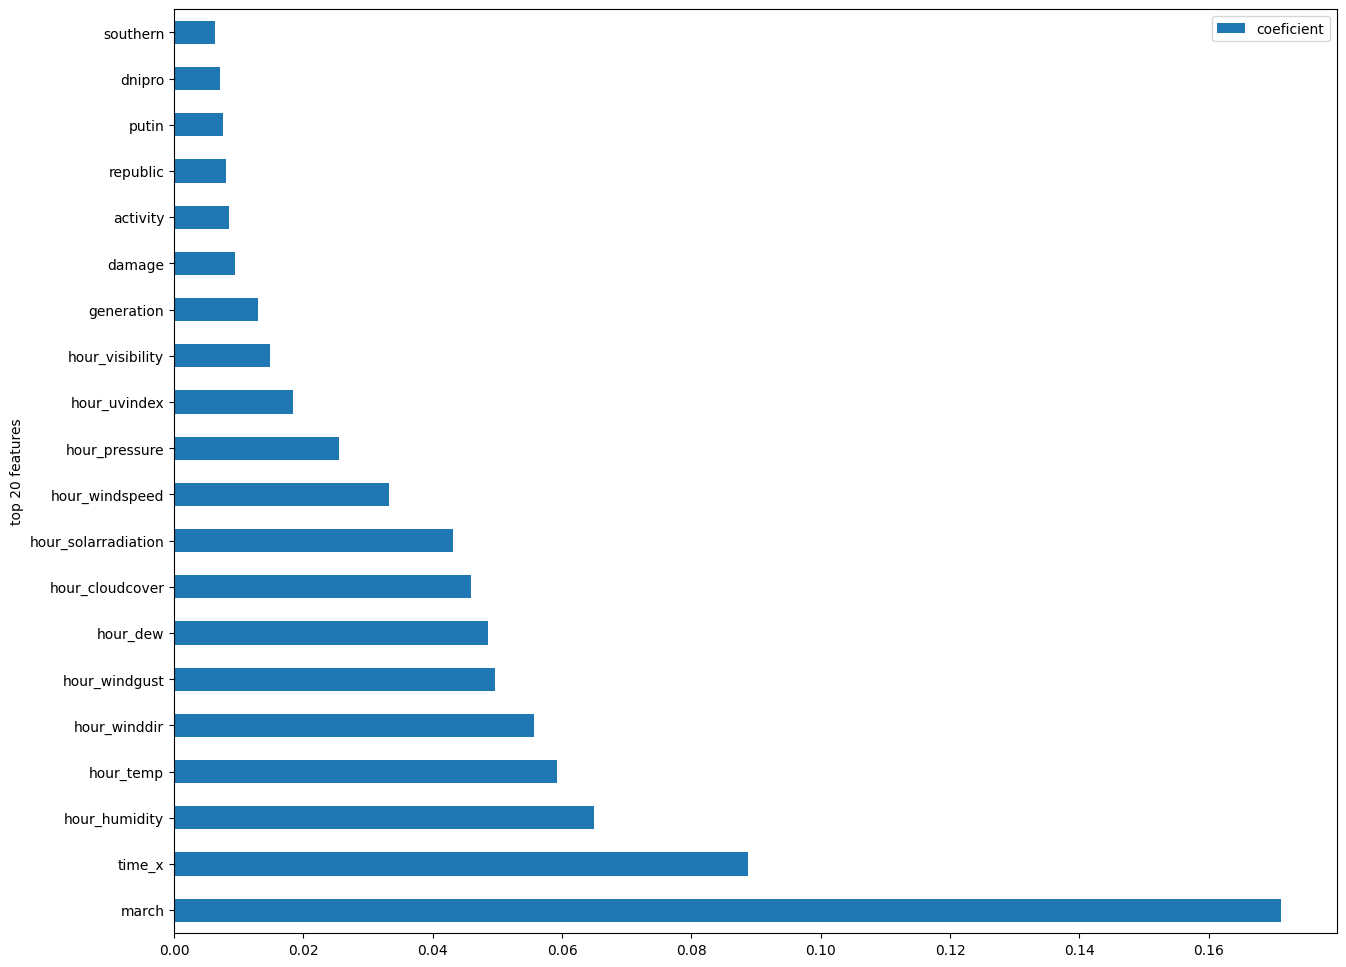

In [55]:
features_data2.plot.barh(figsize=(15,12))

In [56]:
chernihiv_data = pd.read_csv('reg25_chernihiv.csv')
chernihiv_data.head()

,Unnamed: 0,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_snow,day_windgust,...,datetime_combined,date,time,day_of_week,alarm_last_2hours,alarm_last_3hours,alarm_last_4hours,alarm_in_kyiv,alarm_in_poltava,alarm_in_sumy
0,52842,5.2,0.3,2.4,-0.1,83.8,0.3,12.5,0.0,19.8,...,2022-02-24 00:00:00,2022-02-24,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
1,52843,5.2,0.3,2.4,-0.1,83.8,0.3,12.5,0.0,19.8,...,2022-02-24 01:00:00,2022-02-24,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
2,52844,5.2,0.3,2.4,-0.1,83.8,0.3,12.5,0.0,19.8,...,2022-02-24 02:00:00,2022-02-24,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
3,52845,5.2,0.3,2.4,-0.1,83.8,0.3,12.5,0.0,19.8,...,2022-02-24 03:00:00,2022-02-24,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
4,52846,5.2,0.3,2.4,-0.1,83.8,0.3,12.5,0.0,19.8,...,2022-02-24 04:00:00,2022-02-24,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
chernihiv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7943 entries, 0 to 7942
Data columns (total 48 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           7943 non-null   int64  
 1   day_tempmax          7943 non-null   float64
 2   day_tempmin          7943 non-null   float64
 3   day_temp             7943 non-null   float64
 4   day_dew              7943 non-null   float64
 5   day_humidity         7943 non-null   float64
 6   day_precip           7943 non-null   float64
 7   day_precipcover      7943 non-null   float64
 8   day_snow             7943 non-null   float64
 9   day_windgust         7943 non-null   float64
 10  day_windspeed        7943 non-null   float64
 11  day_winddir          7943 non-null   float64
 12  day_pressure         7943 non-null   float64
 13  day_cloudcover       7943 non-null   float64
 14  day_visibility       7943 non-null   float64
 15  day_solarradiation   7943 non-null   f

In [58]:
train_chernihiv = pd.merge(chernihiv_data, tfidf_data, on='date', how='inner')

In [59]:
train_chernihiv['date'] = pd.to_datetime(train_chernihiv['datetime_combined'])
train_chernihiv.set_index('datetime_combined', inplace=True)

In [60]:
train_chernihiv.head()

,Unnamed: 0,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_snow,day_windgust,...,west,western,withdraw,withdrawal,within,without,would,zaporizhia,zaporizhzhia,znpp
datetime_combined,,,,,,,,,,,,,,,,,,,,,
2022-02-24 00:00:00,52842,5.2,0.3,2.4,-0.1,83.8,0.3,12.5,0.0,19.8,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0
2022-02-24 01:00:00,52843,5.2,0.3,2.4,-0.1,83.8,0.3,12.5,0.0,19.8,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0
2022-02-24 02:00:00,52844,5.2,0.3,2.4,-0.1,83.8,0.3,12.5,0.0,19.8,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0
2022-02-24 03:00:00,52845,5.2,0.3,2.4,-0.1,83.8,0.3,12.5,0.0,19.8,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0
2022-02-24 04:00:00,52846,5.2,0.3,2.4,-0.1,83.8,0.3,12.5,0.0,19.8,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0


In [61]:
columns_delete = ['Unnamed: 0', 'region_id_x', 'tf-idf', 'date', 'alarm_last_2hours', 'alarm_last_3hours', 'alarm_last_4hours', 'alarm_in_kyiv', 'alarm_in_poltava', 'alarm_in_sumy']
train_chernihiv.drop(columns=columns_delete, inplace=True)

In [62]:
X = train_chernihiv.drop(columns=['alarm'])
y = train_chernihiv['alarm']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [64]:
clf = DecisionTreeClassifier()
clf_chernihiv = clf.fit(X_train,y_train)

In [65]:
y_pred = clf_chernihiv.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8269230769230769


In [66]:
target_names = ['alert', 'no alert']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       alert       0.89      0.89      0.89      1869
    no alert       0.57      0.56      0.57       471

    accuracy                           0.83      2340
   macro avg       0.73      0.73      0.73      2340
weighted avg       0.83      0.83      0.83      2340



In [67]:
train_chernihiv_without_alert = train_chernihiv.drop(columns=['alarm'])

In [68]:
coeficients = clf_chernihiv.feature_importances_
coef_indexes = np.argsort(np.abs(coeficients))[::-1][:20]
features_names = train_chernihiv_without_alert.columns.tolist()

In [69]:
features_data = pd.DataFrame({'top 20 features chernihiv': [features_names[i] for i in coef_indexes],
                             'coeficient': [coeficients[i] for i in coef_indexes]})

In [70]:
features_data.set_index('top 20 features chernihiv', inplace=True)

<Axes: ylabel='top 20 features chernihiv'>

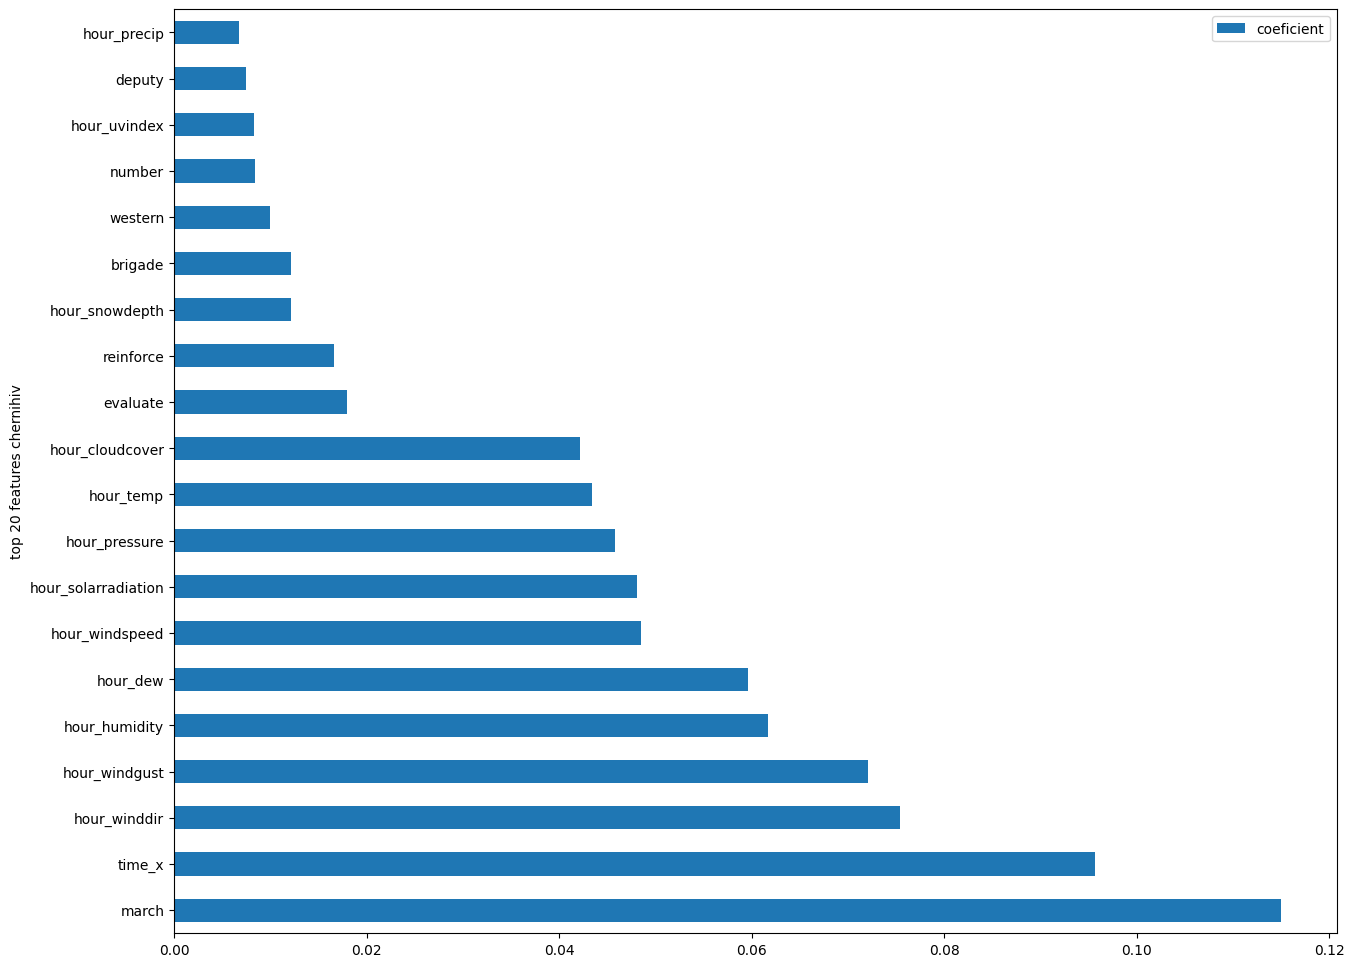

In [71]:
features_data.plot.barh(figsize=(15,12))

In [72]:
chernivtsi_data = pd.read_csv('reg24_chernivtsi.csv')
chernivtsi_data.head()

,Unnamed: 0,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_snow,day_windgust,...,date,time,day_of_week,alarm_last_2hours,alarm_last_3hours,alarm_last_4hours,alarm_in_vinnytsia,alarm_in_frankivsk,alarm_in_ternopil,alarm_in_khmelnytskyi
0,44857,6.5,-0.2,3.4,-0.8,74.9,0.008,8.33,0.0,28.8,...,2022-02-24,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,44858,6.5,-0.2,3.4,-0.8,74.9,0.008,8.33,0.0,28.8,...,2022-02-24,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,44859,6.5,-0.2,3.4,-0.8,74.9,0.008,8.33,0.0,28.8,...,2022-02-24,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,44860,6.5,-0.2,3.4,-0.8,74.9,0.008,8.33,0.0,28.8,...,2022-02-24,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,44861,6.5,-0.2,3.4,-0.8,74.9,0.008,8.33,0.0,28.8,...,2022-02-24,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
train_chernivtsi = pd.merge(chernivtsi_data, tfidf_data, on='date', how='inner')

In [74]:
train_chernivtsi['date'] = pd.to_datetime(train_chernivtsi['datetime_combined'])
train_chernivtsi.set_index('datetime_combined', inplace=True)
train_chernivtsi.head()

,Unnamed: 0,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_snow,day_windgust,...,west,western,withdraw,withdrawal,within,without,would,zaporizhia,zaporizhzhia,znpp
datetime_combined,,,,,,,,,,,,,,,,,,,,,
2022-02-24 00:00:00,44857,6.5,-0.2,3.4,-0.8,74.9,0.008,8.33,0.0,28.8,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0
2022-02-24 01:00:00,44858,6.5,-0.2,3.4,-0.8,74.9,0.008,8.33,0.0,28.8,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0
2022-02-24 02:00:00,44859,6.5,-0.2,3.4,-0.8,74.9,0.008,8.33,0.0,28.8,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0
2022-02-24 03:00:00,44860,6.5,-0.2,3.4,-0.8,74.9,0.008,8.33,0.0,28.8,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0
2022-02-24 04:00:00,44861,6.5,-0.2,3.4,-0.8,74.9,0.008,8.33,0.0,28.8,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0


In [75]:
columns_delete = ['Unnamed: 0', 'region_id_x', 'tf-idf', 'date', 'alarm_last_2hours', 'alarm_last_3hours', 'alarm_last_4hours', 'alarm_in_khmelnytskyi', 'alarm_in_vinnytsia', 'alarm_in_frankivsk', 'alarm_in_ternopil']
train_chernivtsi.drop(columns=columns_delete, inplace=True)

In [76]:
X = train_chernivtsi.drop(columns=['alarm'])
y = train_chernivtsi['alarm']

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [78]:
clf_chernivtsi = clf.fit(X_train, y_train)

In [79]:
y_pred = clf_chernivtsi.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9145299145299145


In [80]:
target_names = ['alert', 'no alert']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       alert       0.95      0.96      0.95      2133
    no alert       0.52      0.43      0.47       207

    accuracy                           0.91      2340
   macro avg       0.73      0.70      0.71      2340
weighted avg       0.91      0.91      0.91      2340



In [81]:
train_chernivtsi_without_alert = train_chernivtsi.drop(columns=['alarm'])

In [82]:
coeficients = clf_chernivtsi.feature_importances_
coef_indexes = np.argsort(np.abs(coeficients))[::-1][:20]
features_names = train_chernivtsi_without_alert.columns.tolist()

In [83]:
features_data = pd.DataFrame({'top 20 features chernivtsi': [features_names[i] for i in coef_indexes],
                             'coeficient': [coeficients[i] for i in coef_indexes]})

In [84]:
features_data

,top 20 features chernivtsi,coeficient
0,time_x,0.095546
1,hour_pressure,0.079569
2,hour_solarradiation,0.077076
3,hour_dew,0.071590
4,hour_temp,0.068574
5,hour_windspeed,0.060957
6,hour_winddir,0.060590
7,hour_humidity,0.055975
8,hour_cloudcover,0.054841
9,hour_windgust,0.044223


In [85]:
features_data.set_index('top 20 features chernivtsi', inplace=True)

<Axes: ylabel='top 20 features chernivtsi'>

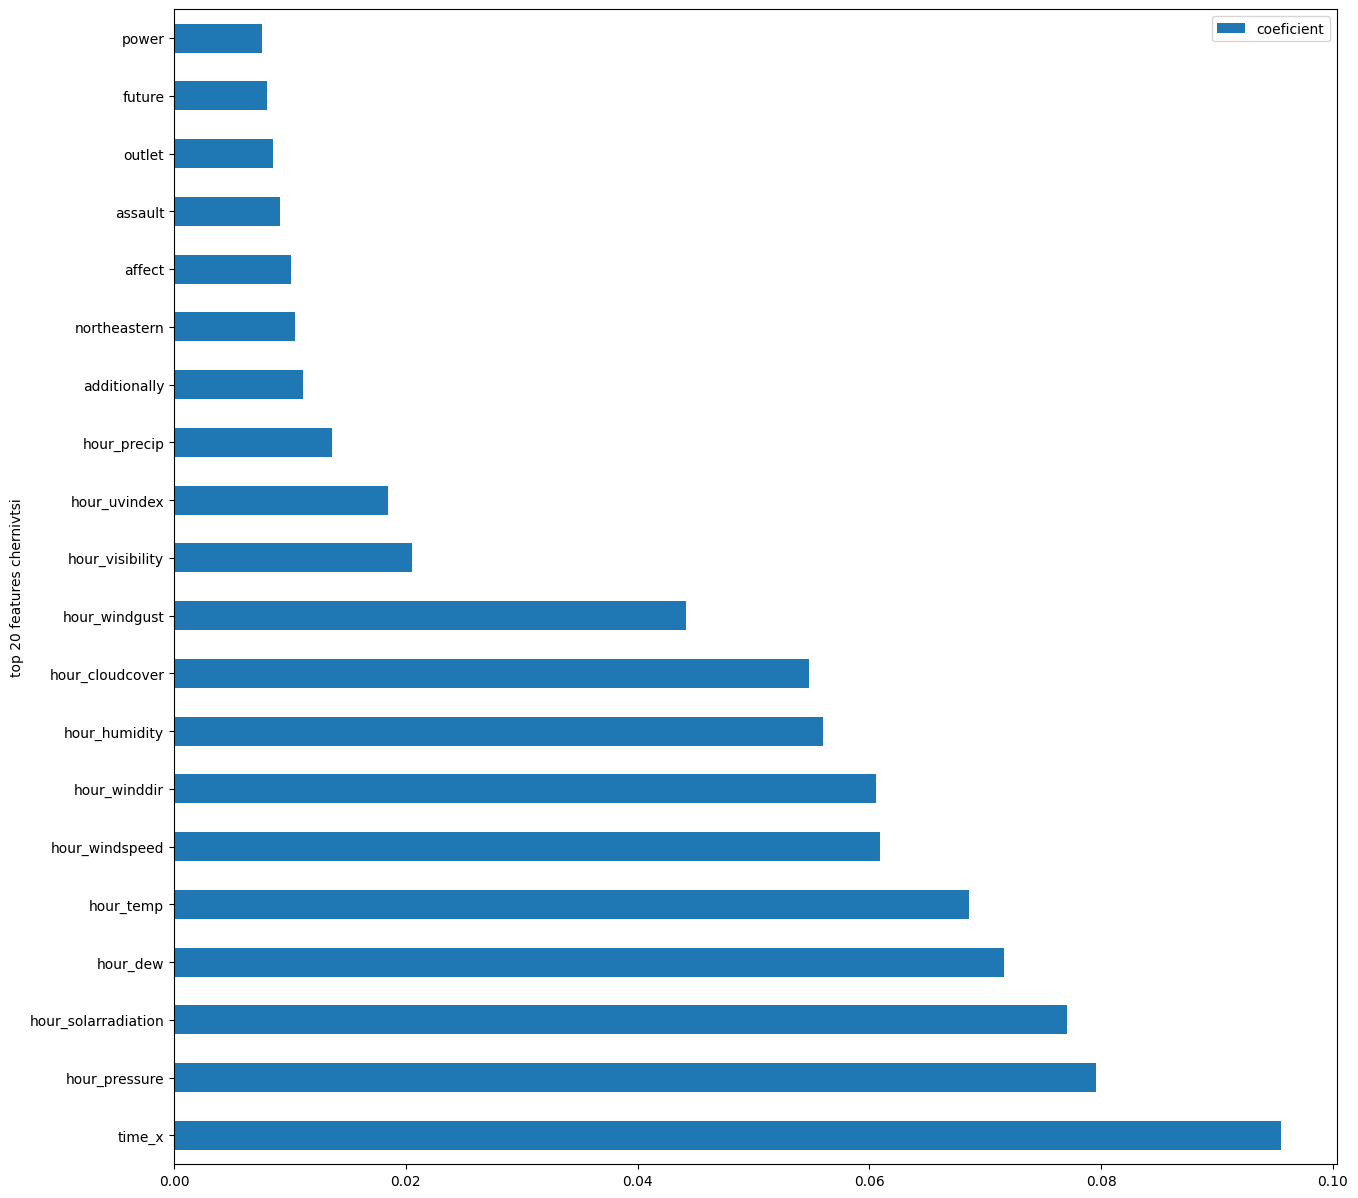

In [86]:
features_data.plot.barh(figsize=(15,15))

In [87]:
cherkasy_data = pd.read_csv('reg23_cherkasy.csv')
cherkasy_data.head()

,Unnamed: 0,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_snow,day_windgust,...,date,time,day_of_week,alarm_last_2hours,alarm_last_3hours,alarm_last_4hours,alarm_in_vinnytsia,alarm_in_kyiv,alarm_in_kropyvnytskyi,alarm_in_poltava
0,170436,4.9,-0.1,1.9,-0.6,83.4,0.0,0.0,0.0,14.4,...,2022-02-24,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,170437,4.9,-0.1,1.9,-0.6,83.4,0.0,0.0,0.0,14.4,...,2022-02-24,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,170438,4.9,-0.1,1.9,-0.6,83.4,0.0,0.0,0.0,14.4,...,2022-02-24,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,170439,4.9,-0.1,1.9,-0.6,83.4,0.0,0.0,0.0,14.4,...,2022-02-24,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,170440,4.9,-0.1,1.9,-0.6,83.4,0.0,0.0,0.0,14.4,...,2022-02-24,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
train_cherkasy = pd.merge(cherkasy_data, tfidf_data, on='date', how='inner')

In [89]:
train_cherkasy['date'] = pd.to_datetime(train_cherkasy['datetime_combined'])
train_cherkasy.set_index('datetime_combined', inplace=True)
train_cherkasy.head()

,Unnamed: 0,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_snow,day_windgust,...,west,western,withdraw,withdrawal,within,without,would,zaporizhia,zaporizhzhia,znpp
datetime_combined,,,,,,,,,,,,,,,,,,,,,
2022-02-24 00:00:00,170436,4.9,-0.1,1.9,-0.6,83.4,0.0,0.0,0.0,14.4,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0
2022-02-24 01:00:00,170437,4.9,-0.1,1.9,-0.6,83.4,0.0,0.0,0.0,14.4,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0
2022-02-24 02:00:00,170438,4.9,-0.1,1.9,-0.6,83.4,0.0,0.0,0.0,14.4,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0
2022-02-24 03:00:00,170439,4.9,-0.1,1.9,-0.6,83.4,0.0,0.0,0.0,14.4,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0
2022-02-24 04:00:00,170440,4.9,-0.1,1.9,-0.6,83.4,0.0,0.0,0.0,14.4,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0


In [90]:
columns_delete = ['Unnamed: 0', 'region_id_x', 'tf-idf', 'date', 'alarm_last_2hours', 'alarm_last_3hours', 'alarm_last_4hours', 'alarm_in_kyiv', 'alarm_in_poltava', 'alarm_in_kropyvnytskyi', 'alarm_in_vinnytsia']
train_cherkasy.drop(columns=columns_delete, inplace=True)

In [91]:
X = train_cherkasy.drop(columns=['alarm'])
y = train_cherkasy['alarm']

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [93]:
clf_cherkasy = clf.fit(X_train, y_train)

In [94]:
y_pred = clf_cherkasy.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7978632478632479


In [95]:
target_names = ['alert', 'no alert']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       alert       0.86      0.87      0.87      1743
    no alert       0.61      0.57      0.59       597

    accuracy                           0.80      2340
   macro avg       0.73      0.72      0.73      2340
weighted avg       0.79      0.80      0.80      2340



In [96]:
train_cherkasy_without_alert = train_cherkasy.drop(columns=['alarm'])
coeficients = clf_cherkasy.feature_importances_
coef_indexes = np.argsort(np.abs(coeficients))[::-1][:20]
features_names = train_cherkasy_without_alert.columns.tolist()

In [97]:
features_data = pd.DataFrame({'top 20 features cherkasy': [features_names[i] for i in coef_indexes],
                             'coeficient': [coeficients[i] for i in coef_indexes]})
features_data.set_index('top 20 features cherkasy', inplace=True)

<Axes: ylabel='top 20 features cherkasy'>

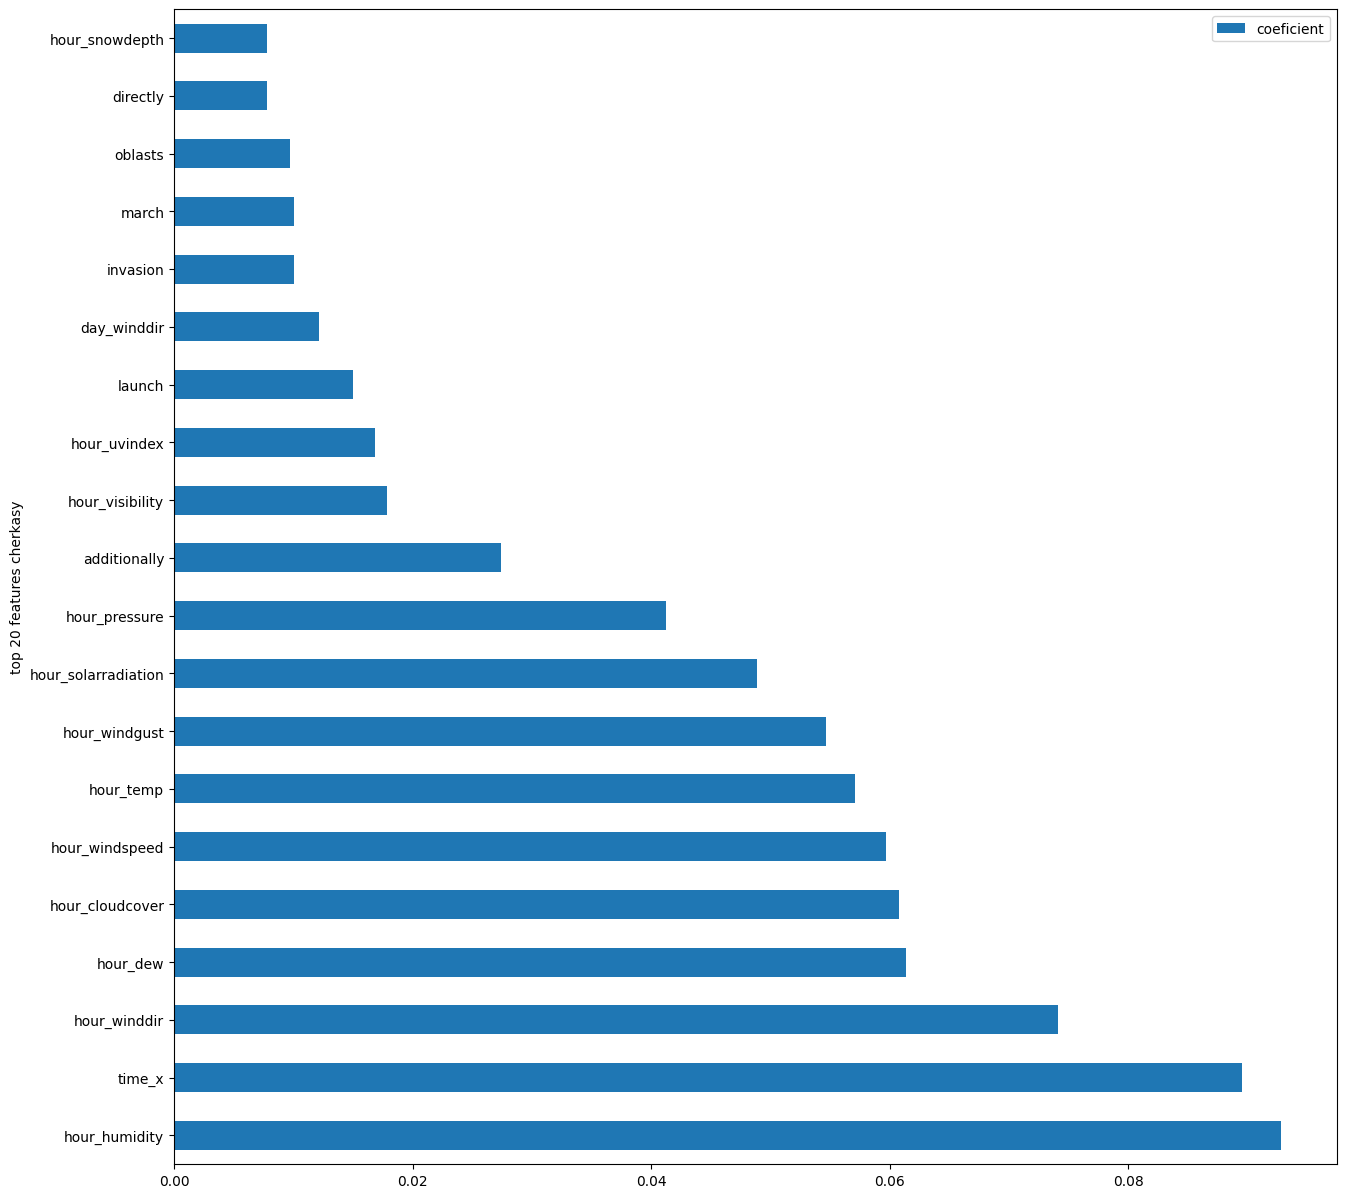

In [98]:
features_data.plot.barh(figsize=(15,15))

In [99]:
kherson_data = pd.read_csv('reg21_kherson.csv')
kherson_data.head()

,Unnamed: 0,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_snow,day_windgust,...,datetime_combined,date,time,day_of_week,alarm_last_2hours,alarm_last_3hours,alarm_last_4hours,alarm_in_dnipro,alarm_in_zaporizhya,alarm_in_mykolaiv
0,36793,9.8,0.0,5.3,-1.0,65.8,0.0,0.0,0.0,28.1,...,2022-02-24 00:00:00,2022-02-24,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
1,36794,9.8,0.0,5.3,-1.0,65.8,0.0,0.0,0.0,28.1,...,2022-02-24 01:00:00,2022-02-24,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
2,36795,9.8,0.0,5.3,-1.0,65.8,0.0,0.0,0.0,28.1,...,2022-02-24 02:00:00,2022-02-24,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
3,36796,9.8,0.0,5.3,-1.0,65.8,0.0,0.0,0.0,28.1,...,2022-02-24 03:00:00,2022-02-24,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
4,36797,9.8,0.0,5.3,-1.0,65.8,0.0,0.0,0.0,28.1,...,2022-02-24 04:00:00,2022-02-24,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [100]:
train_kherson = pd.merge(kherson_data, tfidf_data, on='date', how='inner')

In [101]:
train_kherson['date'] = pd.to_datetime(train_kherson['datetime_combined'])
train_kherson.set_index('datetime_combined', inplace=True)
train_kherson.head()

,Unnamed: 0,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_snow,day_windgust,...,west,western,withdraw,withdrawal,within,without,would,zaporizhia,zaporizhzhia,znpp
datetime_combined,,,,,,,,,,,,,,,,,,,,,
2022-02-24 00:00:00,36793,9.8,0.0,5.3,-1.0,65.8,0.0,0.0,0.0,28.1,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0
2022-02-24 01:00:00,36794,9.8,0.0,5.3,-1.0,65.8,0.0,0.0,0.0,28.1,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0
2022-02-24 02:00:00,36795,9.8,0.0,5.3,-1.0,65.8,0.0,0.0,0.0,28.1,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0
2022-02-24 03:00:00,36796,9.8,0.0,5.3,-1.0,65.8,0.0,0.0,0.0,28.1,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0
2022-02-24 04:00:00,36797,9.8,0.0,5.3,-1.0,65.8,0.0,0.0,0.0,28.1,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0


In [102]:
columns_delete = ['Unnamed: 0', 'region_id_x', 'tf-idf', 'date', 'alarm_last_2hours', 'alarm_last_3hours', 'alarm_last_4hours', 'alarm_in_dnipro', 'alarm_in_zaporizhya', 'alarm_in_mykolaiv']
train_kherson.drop(columns=columns_delete, inplace=True)

In [104]:
X = train_kherson.drop(columns=['alarm'])
y = train_kherson['alarm']

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [106]:
clf_kherson = clf.fit(X_train, y_train)

In [107]:
y_pred = clf_kherson.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9286135693215339


In [108]:
target_names = ['alert', 'no alert']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       alert       0.96      0.96      0.96      1545
    no alert       0.59      0.64      0.61       150

    accuracy                           0.93      1695
   macro avg       0.78      0.80      0.79      1695
weighted avg       0.93      0.93      0.93      1695



In [109]:
train_kherson_without_alert = train_kherson.drop(columns=['alarm'])
coeficients = clf_kherson.feature_importances_
coef_indexes = np.argsort(np.abs(coeficients))[::-1][:20]
features_names = train_kherson_without_alert.columns.tolist()

In [110]:
features_data = pd.DataFrame({'top 20 features kherson': [features_names[i] for i in coef_indexes],
                             'coeficient': [coeficients[i] for i in coef_indexes]})
features_data.set_index('top 20 features kherson', inplace=True)

<Axes: ylabel='top 20 features kherson'>

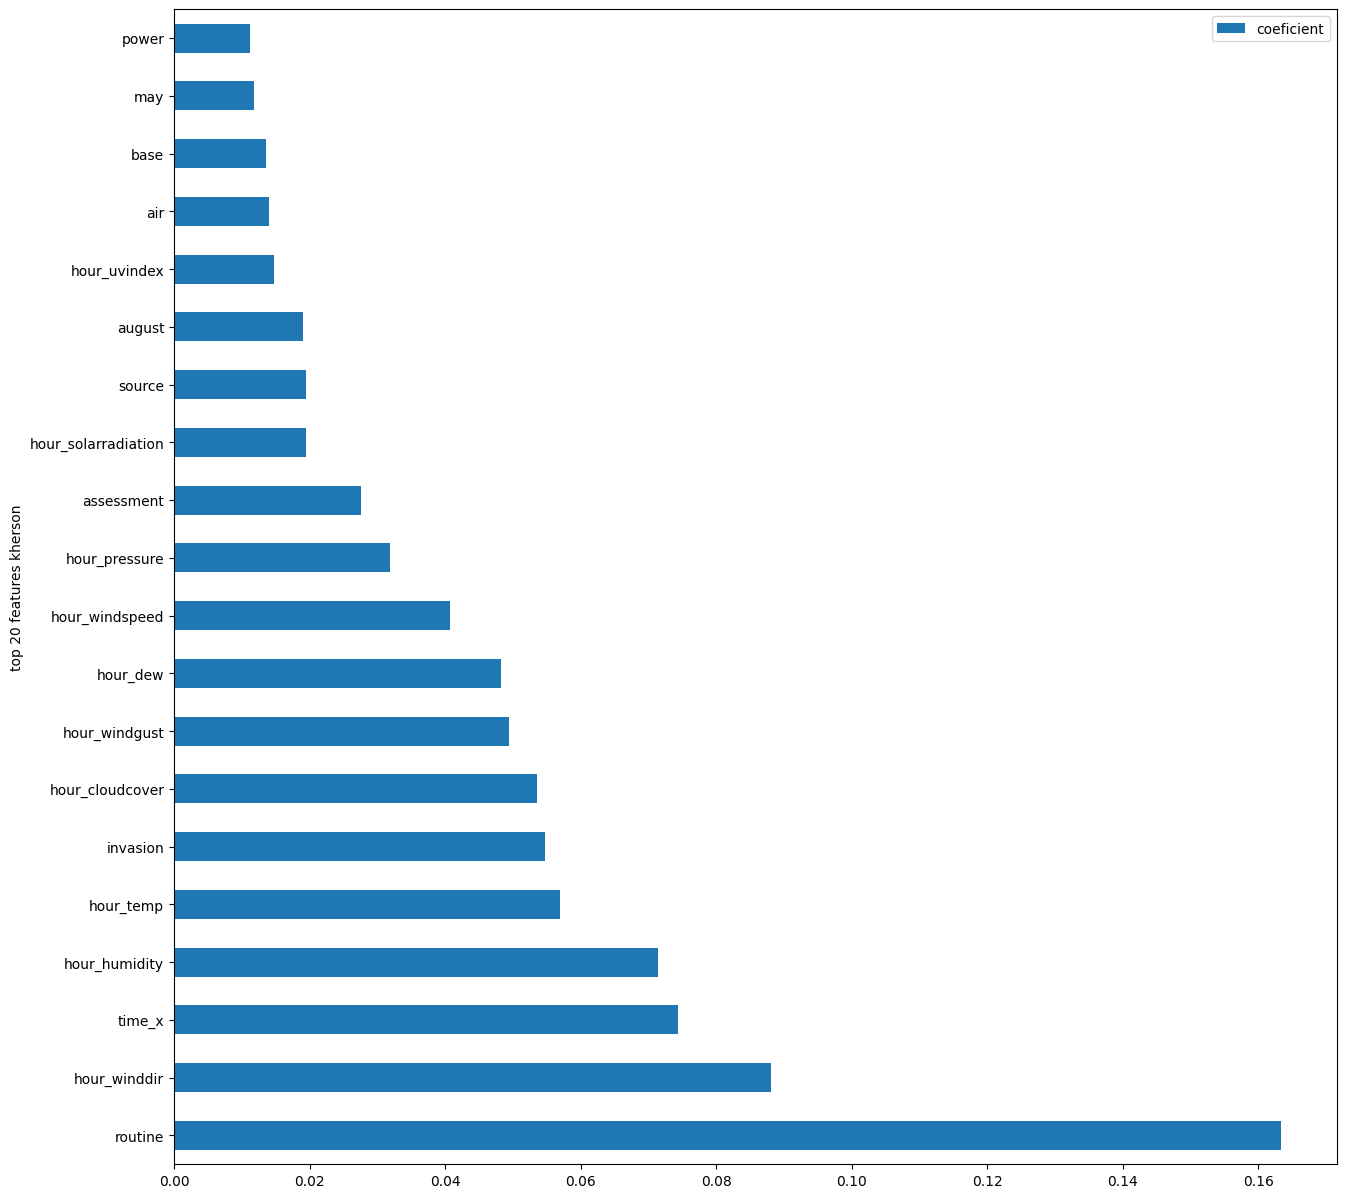

In [116]:
features_data.plot.barh(figsize=(15,15))

In [112]:
kharkiv_data = pd.read_csv('reg20_kharkiv.csv')
kharkiv_data.head()

,Unnamed: 0,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_snow,day_windgust,...,date,time,day_of_week,alarm_last_2hours,alarm_last_3hours,alarm_last_4hours,alarm_in_dnipro,alarm_in_donetsk,alarm_in_poltava,alarm_in_sumy
0,79429,5.0,-4.0,0.6,-4.7,70.0,0.0,0.0,0.0,25.6,...,2022-02-24,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,79430,5.0,-4.0,0.6,-4.7,70.0,0.0,0.0,0.0,25.6,...,2022-02-24,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,79431,5.0,-4.0,0.6,-4.7,70.0,0.0,0.0,0.0,25.6,...,2022-02-24,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,79432,5.0,-4.0,0.6,-4.7,70.0,0.0,0.0,0.0,25.6,...,2022-02-24,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,79433,5.0,-4.0,0.6,-4.7,70.0,0.0,0.0,0.0,25.6,...,2022-02-24,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [113]:
train_kharkiv = pd.merge(kharkiv_data, tfidf_data, on='date', how='inner')

In [115]:
train_kharkiv['date'] = pd.to_datetime(train_kharkiv['datetime_combined'])
train_kharkiv.set_index('datetime_combined', inplace=True)
train_kharkiv.head()

,Unnamed: 0,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_snow,day_windgust,...,west,western,withdraw,withdrawal,within,without,would,zaporizhia,zaporizhzhia,znpp
datetime_combined,,,,,,,,,,,,,,,,,,,,,
2022-02-24 00:00:00,79429,5.0,-4.0,0.6,-4.7,70.0,0.0,0.0,0.0,25.6,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0
2022-02-24 01:00:00,79430,5.0,-4.0,0.6,-4.7,70.0,0.0,0.0,0.0,25.6,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0
2022-02-24 02:00:00,79431,5.0,-4.0,0.6,-4.7,70.0,0.0,0.0,0.0,25.6,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0
2022-02-24 03:00:00,79432,5.0,-4.0,0.6,-4.7,70.0,0.0,0.0,0.0,25.6,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0
2022-02-24 04:00:00,79433,5.0,-4.0,0.6,-4.7,70.0,0.0,0.0,0.0,25.6,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0


In [117]:
columns_delete = ['Unnamed: 0', 'region_id_x', 'tf-idf', 'date', 'alarm_last_2hours', 'alarm_last_3hours', 'alarm_last_4hours', 'alarm_in_dnipro', 'alarm_in_donetsk', 'alarm_in_poltava', 'alarm_in_sumy']
train_kharkiv.drop(columns=columns_delete, inplace=True)

In [118]:
X = train_kharkiv.drop(columns=['alarm'])
y = train_kharkiv['alarm']

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [120]:
clf_kharkiv = clf.fit(X_train, y_train)

In [121]:
y_pred = clf_kharkiv.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6935897435897436


In [122]:
target_names = ['alert', 'no alert']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       alert       0.73      0.70      0.72      1299
    no alert       0.65      0.68      0.66      1041

    accuracy                           0.69      2340
   macro avg       0.69      0.69      0.69      2340
weighted avg       0.70      0.69      0.69      2340



In [123]:
train_kharkiv_without_alert = train_kherson.drop(columns=['alarm'])
coeficients = clf_kharkiv.feature_importances_
coef_indexes = np.argsort(np.abs(coeficients))[::-1][:20]
features_names = train_kharkiv_without_alert.columns.tolist()

In [124]:
features_data = pd.DataFrame({'top 20 features kharkiv': [features_names[i] for i in coef_indexes],
                             'coeficient': [coeficients[i] for i in coef_indexes]})
features_data.set_index('top 20 features kharkiv', inplace=True)

<Axes: ylabel='top 20 features kharkiv'>

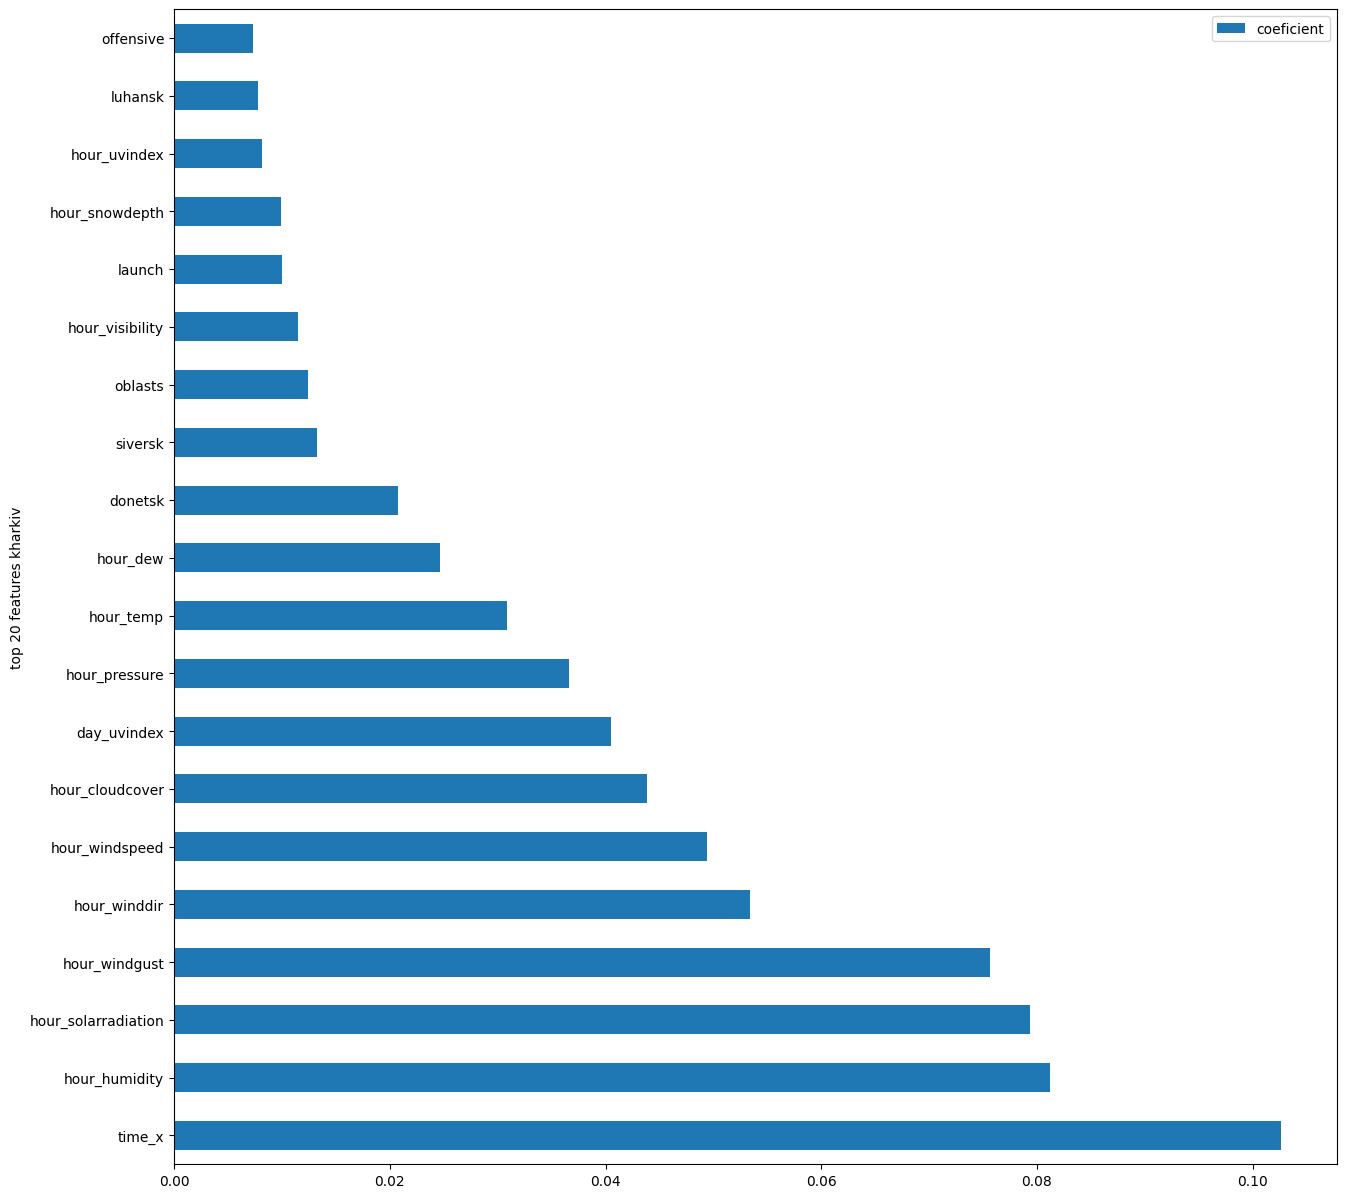

In [125]:
features_data.plot.barh(figsize=(15,15))

In [126]:
ternopil_data = pd.read_csv('reg19_ternopil.csv')
ternopil_data.head()

,Unnamed: 0,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_snow,day_windgust,...,time,day_of_week,alarm_last_2hours,alarm_last_3hours,alarm_last_4hours,alarm_in_frankivsk,alarm_in_lviv,alarm_in_rivne,alarm_in_khmelnytskyi,alarm_in_chernivtsi
0,137872,3.8,-0.2,1.6,-1.0,83.8,2.0,4.17,0.1,36.7,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,137873,3.8,-0.2,1.6,-1.0,83.8,2.0,4.17,0.1,36.7,...,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,137874,3.8,-0.2,1.6,-1.0,83.8,2.0,4.17,0.1,36.7,...,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,137875,3.8,-0.2,1.6,-1.0,83.8,2.0,4.17,0.1,36.7,...,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,137876,3.8,-0.2,1.6,-1.0,83.8,2.0,4.17,0.1,36.7,...,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [127]:
train_ternopil = pd.merge(ternopil_data, tfidf_data, on='date', how='inner')

In [128]:
train_ternopil['date'] = pd.to_datetime(train_ternopil['datetime_combined'])
train_ternopil.set_index('datetime_combined', inplace=True)
train_ternopil.head()

,Unnamed: 0,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_snow,day_windgust,...,west,western,withdraw,withdrawal,within,without,would,zaporizhia,zaporizhzhia,znpp
datetime_combined,,,,,,,,,,,,,,,,,,,,,
2022-02-24 00:00:00,137872,3.8,-0.2,1.6,-1.0,83.8,2.0,4.17,0.1,36.7,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0
2022-02-24 01:00:00,137873,3.8,-0.2,1.6,-1.0,83.8,2.0,4.17,0.1,36.7,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0
2022-02-24 02:00:00,137874,3.8,-0.2,1.6,-1.0,83.8,2.0,4.17,0.1,36.7,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0
2022-02-24 03:00:00,137875,3.8,-0.2,1.6,-1.0,83.8,2.0,4.17,0.1,36.7,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0
2022-02-24 04:00:00,137876,3.8,-0.2,1.6,-1.0,83.8,2.0,4.17,0.1,36.7,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0


In [130]:
columns_delete = ['Unnamed: 0', 'region_id_x', 'tf-idf', 'date', 'alarm_last_2hours', 'alarm_last_3hours', 'alarm_last_4hours', 'alarm_in_frankivsk', 'alarm_in_lviv', 'alarm_in_rivne', 'alarm_in_chernivtsi', 'alarm_in_khmelnytskyi']
train_ternopil.drop(columns=columns_delete, inplace=True)

In [131]:
X = train_ternopil.drop(columns=['alarm'])
y = train_ternopil['alarm']

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [133]:
clf_ternopil = clf.fit(X_train, y_train)

In [134]:
y_pred = clf_ternopil.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.888034188034188


In [135]:
target_names = ['alert', 'no alert']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       alert       0.94      0.94      0.94      2077
    no alert       0.50      0.49      0.50       263

    accuracy                           0.89      2340
   macro avg       0.72      0.71      0.72      2340
weighted avg       0.89      0.89      0.89      2340



In [136]:
train_ternopil_without_alert = train_ternopil.drop(columns=['alarm'])
coeficients = clf_ternopil.feature_importances_
coef_indexes = np.argsort(np.abs(coeficients))[::-1][:20]
features_names = train_ternopil_without_alert.columns.tolist()

In [137]:
features_data = pd.DataFrame({'top 20 features ternopil': [features_names[i] for i in coef_indexes],
                             'coeficient': [coeficients[i] for i in coef_indexes]})
features_data.set_index('top 20 features ternopil', inplace=True)

<Axes: ylabel='top 20 features ternopil'>

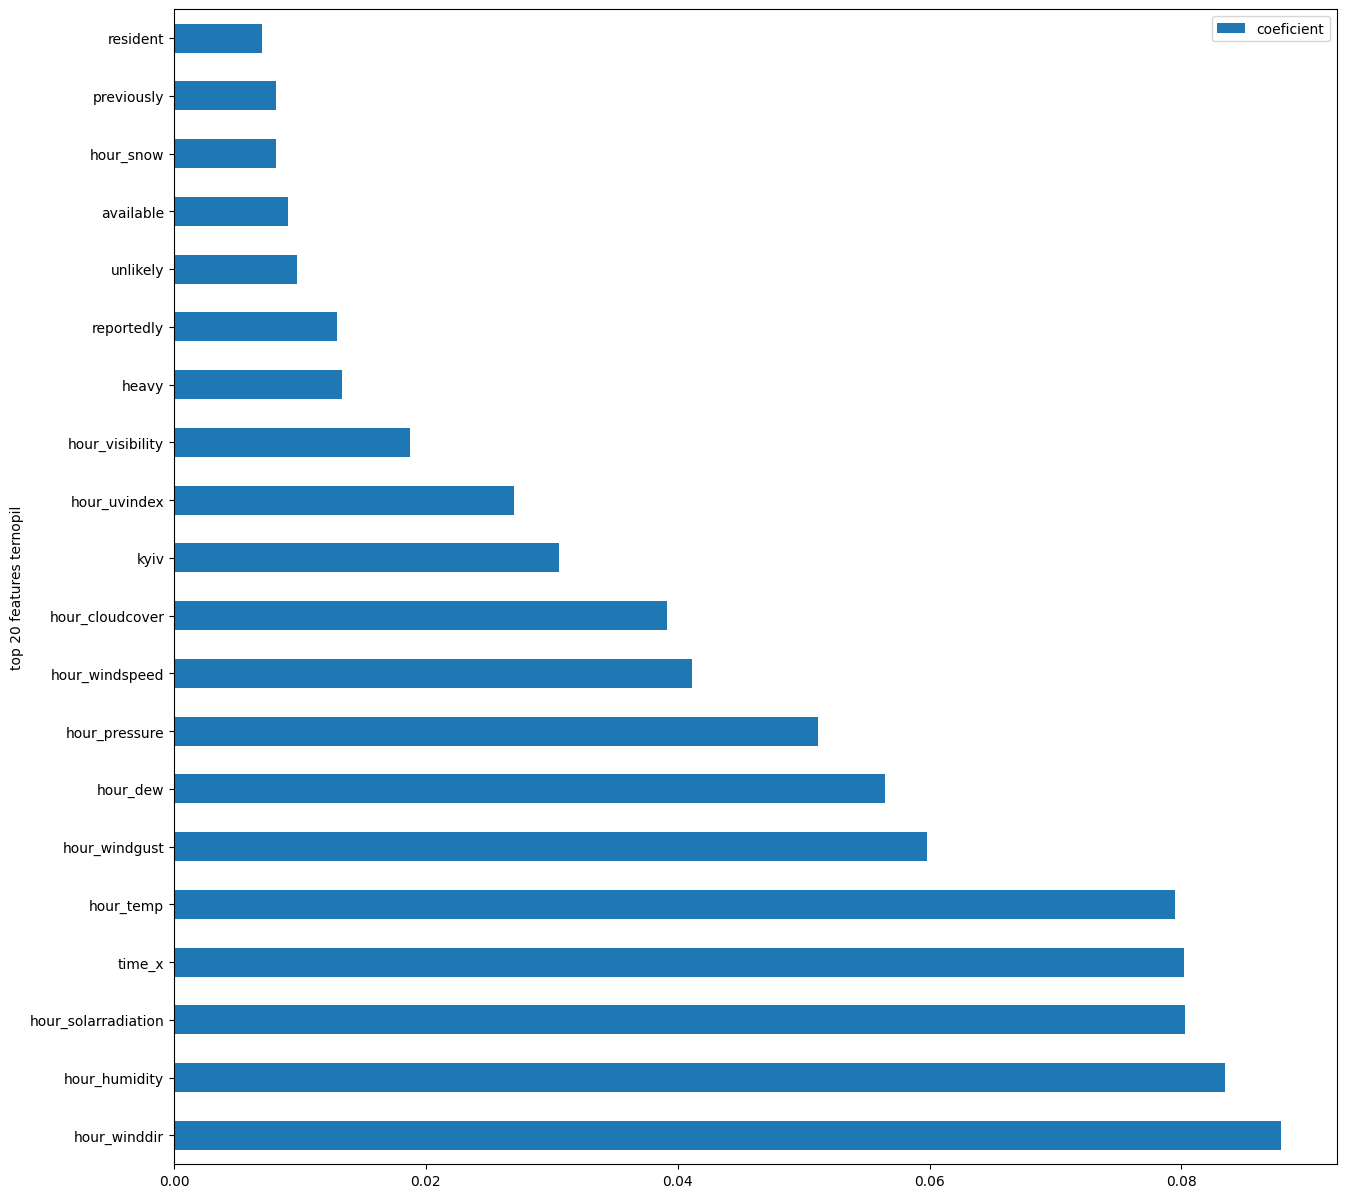

In [138]:
features_data.plot.barh(figsize=(15,15))

In [139]:
sumy_data = pd.read_csv('reg18_sumy.csv')
sumy_data.head()

,Unnamed: 0,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_snow,day_windgust,...,datetime_combined,date,time,day_of_week,alarm_last_2hours,alarm_last_3hours,alarm_last_4hours,alarm_in_poltava,alarm_in_kharkiv,alarm_in_chernihiv
0,178766,5.3,-3.8,0.4,-4.7,69.9,0.0,0.0,0.0,19.1,...,2022-02-24 00:00:00,2022-02-24,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
1,178767,5.3,-3.8,0.4,-4.7,69.9,0.0,0.0,0.0,19.1,...,2022-02-24 01:00:00,2022-02-24,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
2,178768,5.3,-3.8,0.4,-4.7,69.9,0.0,0.0,0.0,19.1,...,2022-02-24 02:00:00,2022-02-24,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
3,178769,5.3,-3.8,0.4,-4.7,69.9,0.0,0.0,0.0,19.1,...,2022-02-24 03:00:00,2022-02-24,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
4,178770,5.3,-3.8,0.4,-4.7,69.9,0.0,0.0,0.0,19.1,...,2022-02-24 04:00:00,2022-02-24,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [140]:
train_sumy = pd.merge(sumy_data, tfidf_data, on='date', how='inner')

In [141]:
train_sumy['date'] = pd.to_datetime(train_sumy['datetime_combined'])
train_sumy.set_index('datetime_combined', inplace=True)
train_sumy.head()

,Unnamed: 0,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_snow,day_windgust,...,west,western,withdraw,withdrawal,within,without,would,zaporizhia,zaporizhzhia,znpp
datetime_combined,,,,,,,,,,,,,,,,,,,,,
2022-02-24 00:00:00,178766,5.3,-3.8,0.4,-4.7,69.9,0.0,0.0,0.0,19.1,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0
2022-02-24 01:00:00,178767,5.3,-3.8,0.4,-4.7,69.9,0.0,0.0,0.0,19.1,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0
2022-02-24 02:00:00,178768,5.3,-3.8,0.4,-4.7,69.9,0.0,0.0,0.0,19.1,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0
2022-02-24 03:00:00,178769,5.3,-3.8,0.4,-4.7,69.9,0.0,0.0,0.0,19.1,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0
2022-02-24 04:00:00,178770,5.3,-3.8,0.4,-4.7,69.9,0.0,0.0,0.0,19.1,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0


In [142]:
columns_delete = ['Unnamed: 0', 'region_id_x', 'tf-idf', 'date', 'alarm_last_2hours', 'alarm_last_3hours', 'alarm_last_4hours', 'alarm_in_chernihiv', 'alarm_in_kharkiv', 'alarm_in_poltava']
train_sumy.drop(columns=columns_delete, inplace=True)

In [143]:
X = train_sumy.drop(columns=['alarm'])
y = train_sumy['alarm']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [147]:
clf_sumy = clf.fit(X_train, y_train)

In [148]:
y_pred = clf_sumy.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.794017094017094


In [149]:
target_names = ['alert', 'no alert']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       alert       0.86      0.87      0.87      1816
    no alert       0.54      0.52      0.53       524

    accuracy                           0.79      2340
   macro avg       0.70      0.70      0.70      2340
weighted avg       0.79      0.79      0.79      2340



In [150]:
train_sumy_without_alert = train_sumy.drop(columns=['alarm'])
coeficients = clf_sumy.feature_importances_
coef_indexes = np.argsort(np.abs(coeficients))[::-1][:20]
features_names = train_sumy_without_alert.columns.tolist()

In [151]:
features_data = pd.DataFrame({'top 20 features sumy': [features_names[i] for i in coef_indexes],
                             'coeficient': [coeficients[i] for i in coef_indexes]})
features_data.set_index('top 20 features sumy', inplace=True)

<Axes: ylabel='top 20 features sumy'>

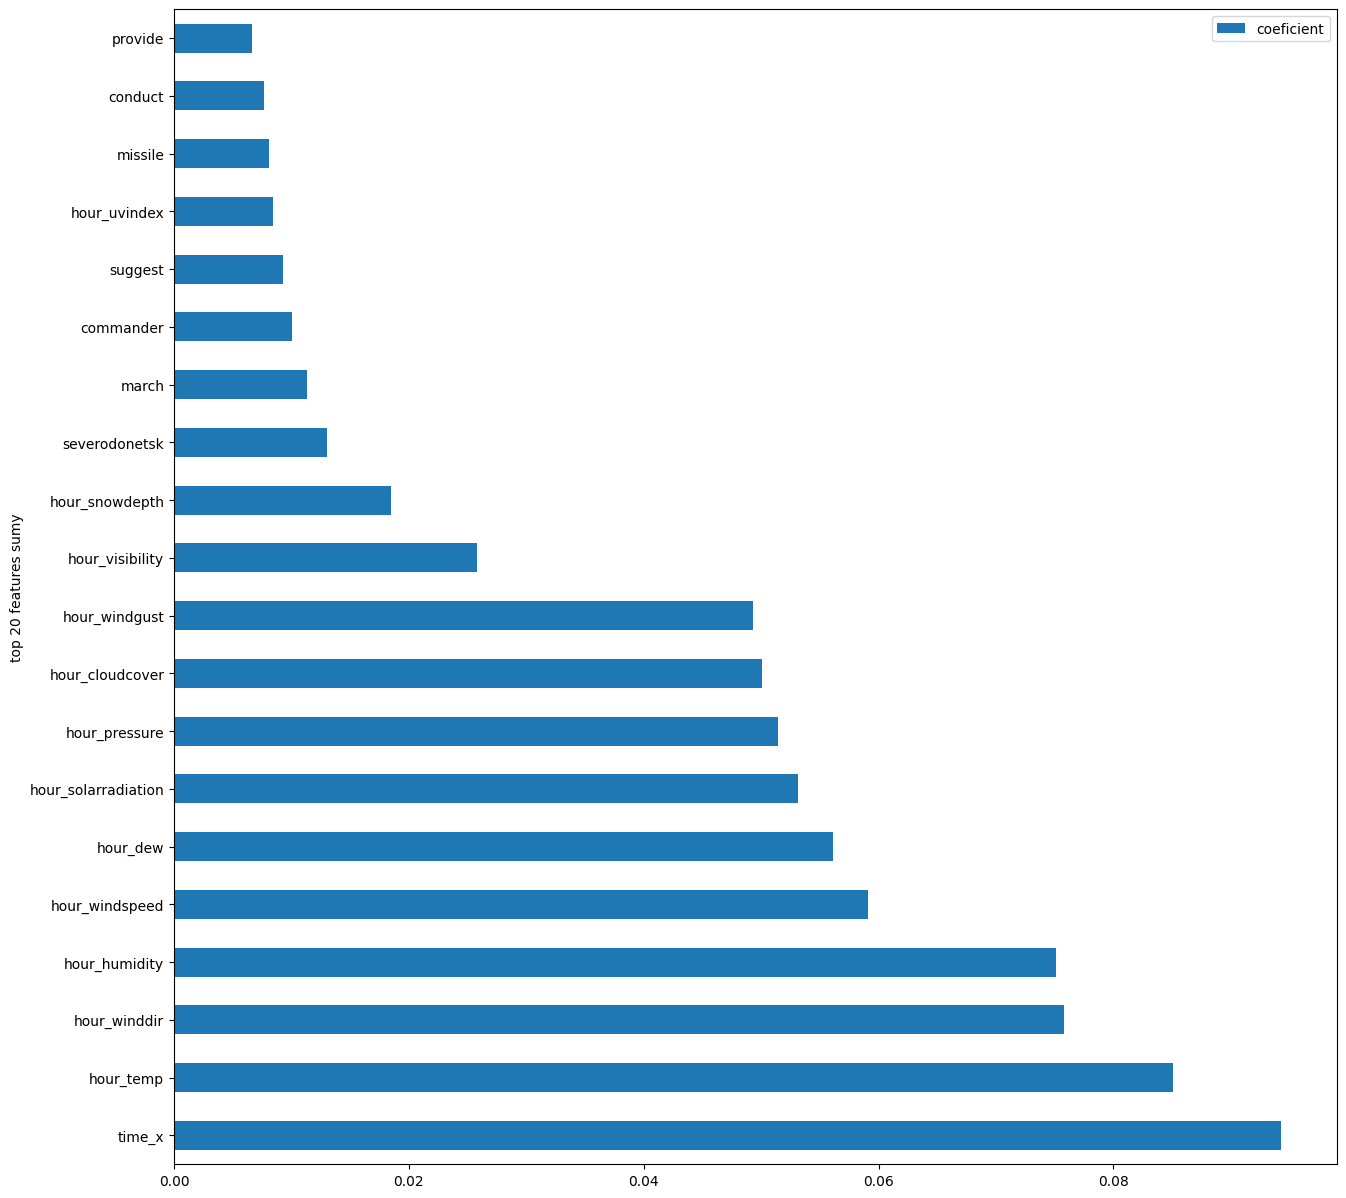

In [152]:
features_data.plot.barh(figsize=(15,15))

In [153]:
rivne_data = pd.read_csv('reg17_rivne.csv')
rivne_data.head()

,Unnamed: 0,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_snow,day_windgust,...,time,day_of_week,alarm_last_2hours,alarm_last_3hours,alarm_last_4hours,alarm_in_lutsk,alarm_in_zhytomyr,alarm_in_lviv,alarm_in_ternopil,alarm_in_khmelnytskyi
0,121154,4.7,0.8,2.5,0.3,85.6,0.214,8.33,0.0,25.6,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,121155,4.7,0.8,2.5,0.3,85.6,0.214,8.33,0.0,25.6,...,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,121156,4.7,0.8,2.5,0.3,85.6,0.214,8.33,0.0,25.6,...,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,121157,4.7,0.8,2.5,0.3,85.6,0.214,8.33,0.0,25.6,...,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,121158,4.7,0.8,2.5,0.3,85.6,0.214,8.33,0.0,25.6,...,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [154]:
train_rivne = pd.merge(rivne_data, tfidf_data, on='date', how='inner')

In [165]:
train_rivne['date'] = pd.to_datetime(train_rivne['datetime_combined'])
train_rivne.set_index('datetime_combined', inplace=True)
train_rivne.head()

KeyError: 'datetime_combined'

In [166]:
columns_delete = ['alarm_in_lutsk']
train_rivne.drop(columns=columns_delete, inplace=True)

In [167]:
X = train_rivne.drop(columns=['alarm'])
y = train_rivne['alarm']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [168]:
clf_rivne = clf.fit(X_train, y_train)

In [169]:
y_pred = clf_rivne.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8567807351077313


In [170]:
target_names = ['alert', 'no alert']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       alert       0.92      0.92      0.92      1381
    no alert       0.42      0.40      0.41       197

    accuracy                           0.86      1578
   macro avg       0.67      0.66      0.66      1578
weighted avg       0.85      0.86      0.86      1578



In [171]:
train_rivne_without_alert = train_rivne.drop(columns=['alarm'])
coeficients = clf_rivne.feature_importances_
coef_indexes = np.argsort(np.abs(coeficients))[::-1][:20]
features_names = train_rivne_without_alert.columns.tolist()

In [172]:
features_data = pd.DataFrame({'top 20 features rivne': [features_names[i] for i in coef_indexes],
                             'coeficient': [coeficients[i] for i in coef_indexes]})
features_data.set_index('top 20 features rivne', inplace=True)

<Axes: ylabel='top 20 features rivne'>

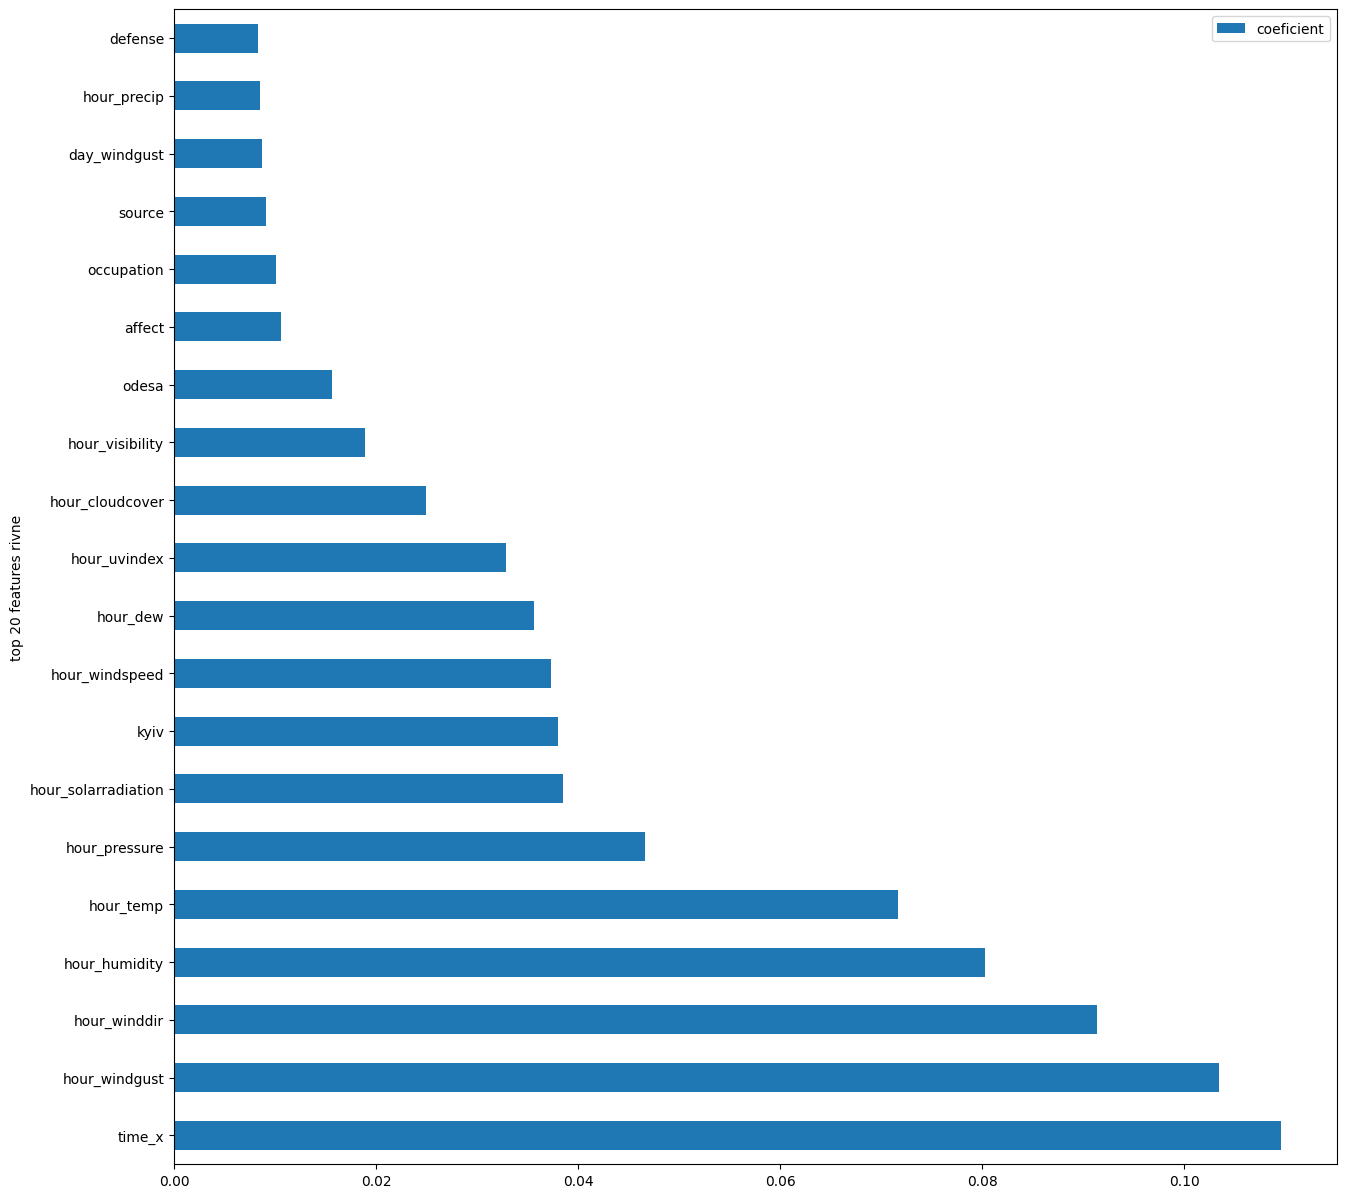

In [173]:
features_data.plot.barh(figsize=(15,15))

In [174]:
poltava_data = pd.read_csv('reg16_poltava.csv')
poltava_data.head()

,Unnamed: 0,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_snow,day_windgust,...,alarm_last_2hours,alarm_last_3hours,alarm_last_4hours,alarm_in_dnipro,alarm_in_kyiv,alarm_in_kropyvnytskyi,alarm_in_sumy,alarm_in_kharkiv,alarm_in_cherkasy,alarm_in_chernihiv
0,145874,5.7,-2.7,1.1,-3.6,71.9,0.0,0.0,0.0,28.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,145875,5.7,-2.7,1.1,-3.6,71.9,0.0,0.0,0.0,28.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,145876,5.7,-2.7,1.1,-3.6,71.9,0.0,0.0,0.0,28.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,145877,5.7,-2.7,1.1,-3.6,71.9,0.0,0.0,0.0,28.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,145878,5.7,-2.7,1.1,-3.6,71.9,0.0,0.0,0.0,28.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [175]:
train_poltava = pd.merge(poltava_data, tfidf_data, on='date', how='inner')

In [176]:
train_poltava['date'] = pd.to_datetime(train_poltava['datetime_combined'])
train_poltava.set_index('datetime_combined', inplace=True)
train_poltava.head()

,Unnamed: 0,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_snow,day_windgust,...,west,western,withdraw,withdrawal,within,without,would,zaporizhia,zaporizhzhia,znpp
datetime_combined,,,,,,,,,,,,,,,,,,,,,
2022-02-24 00:00:00,145874,5.7,-2.7,1.1,-3.6,71.9,0.0,0.0,0.0,28.4,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0
2022-02-24 01:00:00,145875,5.7,-2.7,1.1,-3.6,71.9,0.0,0.0,0.0,28.4,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0
2022-02-24 02:00:00,145876,5.7,-2.7,1.1,-3.6,71.9,0.0,0.0,0.0,28.4,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0
2022-02-24 03:00:00,145877,5.7,-2.7,1.1,-3.6,71.9,0.0,0.0,0.0,28.4,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0
2022-02-24 04:00:00,145878,5.7,-2.7,1.1,-3.6,71.9,0.0,0.0,0.0,28.4,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0


In [186]:
columns_delete = ['Unnamed: 0', 'region_id_x', 'tf-idf', 'date', 'alarm_last_2hours', 'alarm_last_3hours', 'alarm_last_4hours', 'alarm_in_kyiv', 'alarm_in_kharkiv', 'alarm_in_sumy', 'alarm_in_dnipro', 'alarm_in_cherkasy', 'alarm_in_kropyvnytskyi', 'alarm_in_chernihiv']
train_poltava.drop(columns=columns_delete, inplace=True)

In [187]:
X = train_poltava.drop(columns=['alarm'])
y = train_poltava['alarm']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [188]:
clf_poltava = clf.fit(X_train, y_train)

In [189]:
y_pred = clf_poltava.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.717948717948718


In [190]:
target_names = ['alert', 'no alert']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       alert       0.79      0.81      0.80      1628
    no alert       0.54      0.51      0.52       712

    accuracy                           0.72      2340
   macro avg       0.66      0.66      0.66      2340
weighted avg       0.71      0.72      0.72      2340



In [191]:
train_poltava_without_alert = train_poltava.drop(columns=['alarm'])
coeficients = clf_poltava.feature_importances_
coef_indexes = np.argsort(np.abs(coeficients))[::-1][:20]
features_names = train_poltava_without_alert.columns.tolist()

In [192]:
features_data = pd.DataFrame({'top 20 features poltava': [features_names[i] for i in coef_indexes],
                             'coeficient': [coeficients[i] for i in coef_indexes]})
features_data.set_index('top 20 features poltava', inplace=True)

<Axes: ylabel='top 20 features poltava'>

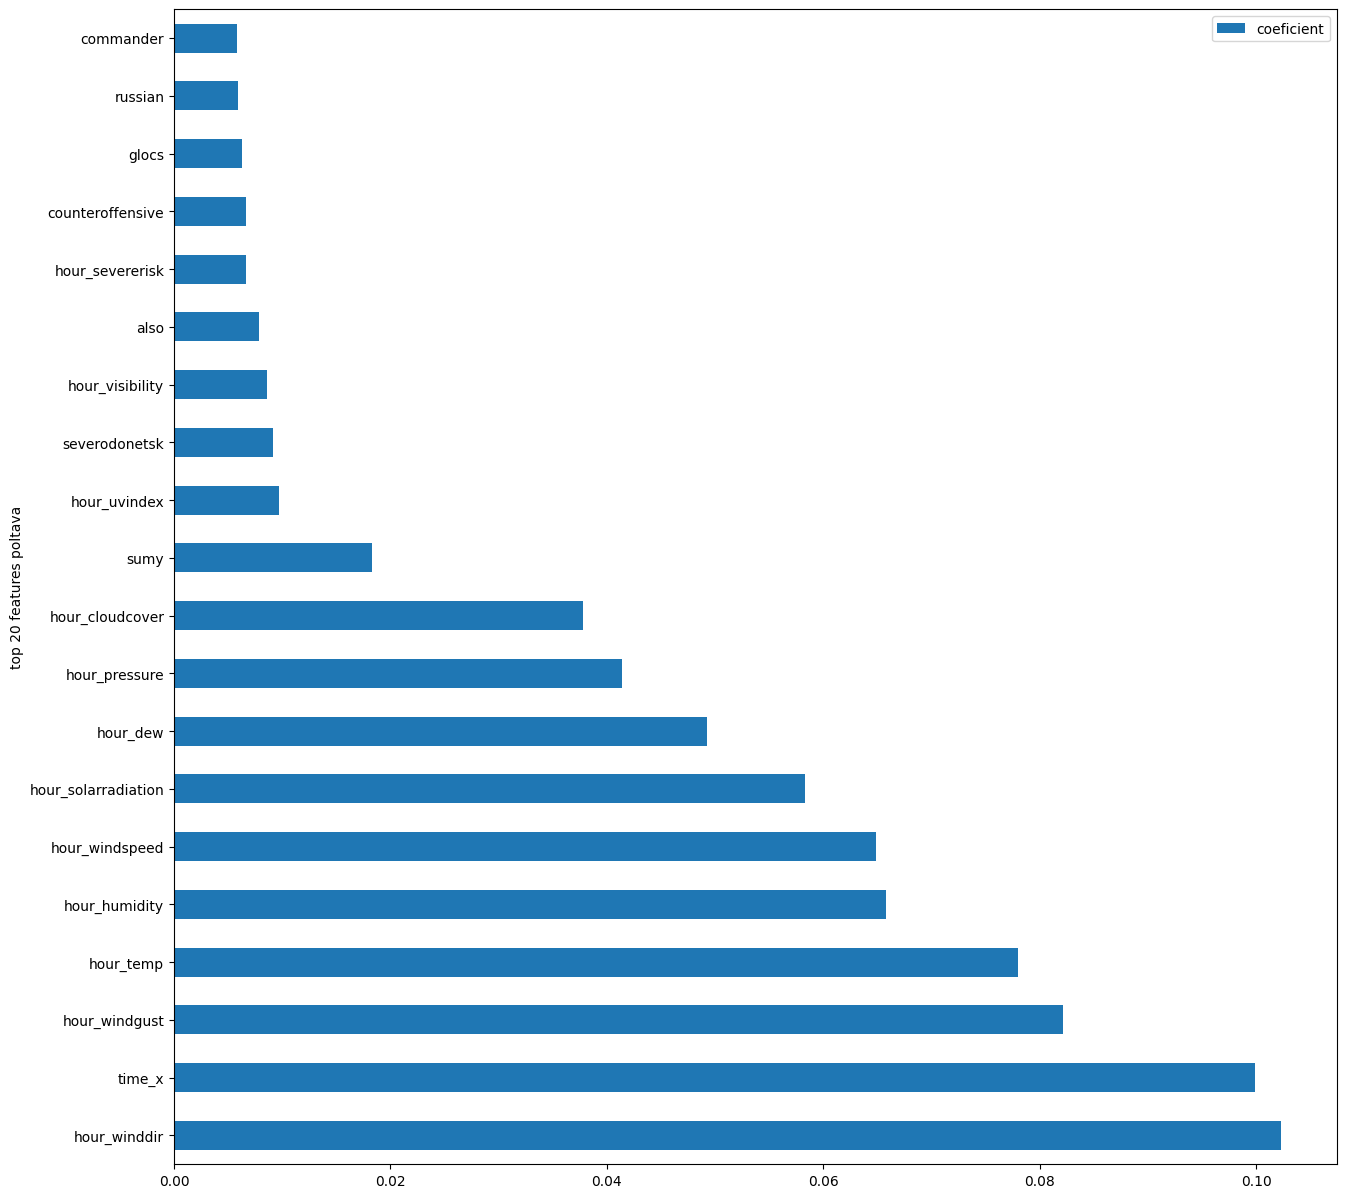

In [193]:
features_data.plot.barh(figsize=(15,15))

In [194]:
odesa_data = pd.read_csv('reg15_odesa.csv')
odesa_data.head()

,Unnamed: 0,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_snow,day_windgust,...,datetime_combined,date,time,day_of_week,alarm_last_2hours,alarm_last_3hours,alarm_last_4hours,alarm_in_vinnytsia,alarm_in_kropyvnytskyi,alarm_in_mykolaiv
0,61223,9.0,1.0,5.2,0.8,74.0,0.0,0.0,0.0,27.4,...,2022-02-24 00:00:00,2022-02-24,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
1,61224,9.0,1.0,5.2,0.8,74.0,0.0,0.0,0.0,27.4,...,2022-02-24 01:00:00,2022-02-24,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
2,61225,9.0,1.0,5.2,0.8,74.0,0.0,0.0,0.0,27.4,...,2022-02-24 02:00:00,2022-02-24,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
3,61226,9.0,1.0,5.2,0.8,74.0,0.0,0.0,0.0,27.4,...,2022-02-24 03:00:00,2022-02-24,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
4,61227,9.0,1.0,5.2,0.8,74.0,0.0,0.0,0.0,27.4,...,2022-02-24 04:00:00,2022-02-24,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [195]:
train_odesa = pd.merge(odesa_data, tfidf_data, on='date', how='inner')

In [196]:
train_odesa['date'] = pd.to_datetime(train_odesa['datetime_combined'])
train_odesa.set_index('datetime_combined', inplace=True)
train_odesa.head()

,Unnamed: 0,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_snow,day_windgust,...,west,western,withdraw,withdrawal,within,without,would,zaporizhia,zaporizhzhia,znpp
datetime_combined,,,,,,,,,,,,,,,,,,,,,
2022-02-24 00:00:00,61223,9.0,1.0,5.2,0.8,74.0,0.0,0.0,0.0,27.4,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0
2022-02-24 01:00:00,61224,9.0,1.0,5.2,0.8,74.0,0.0,0.0,0.0,27.4,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0
2022-02-24 02:00:00,61225,9.0,1.0,5.2,0.8,74.0,0.0,0.0,0.0,27.4,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0
2022-02-24 03:00:00,61226,9.0,1.0,5.2,0.8,74.0,0.0,0.0,0.0,27.4,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0
2022-02-24 04:00:00,61227,9.0,1.0,5.2,0.8,74.0,0.0,0.0,0.0,27.4,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0


In [198]:
columns_delete = ['Unnamed: 0', 'region_id_x', 'tf-idf', 'date', 'alarm_last_2hours', 'alarm_last_3hours', 'alarm_last_4hours', 'alarm_in_mykolaiv', 'alarm_in_vinnytsia', 'alarm_in_kropyvnytskyi']
train_odesa.drop(columns=columns_delete, inplace=True)

In [199]:
X = train_odesa.drop(columns=['alarm'])
y = train_odesa['alarm']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [200]:
clf_odesa = clf.fit(X_train, y_train)

In [201]:
y_pred = clf_odesa.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7974358974358975


In [202]:
target_names = ['alert', 'no alert']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       alert       0.87      0.88      0.87      1836
    no alert       0.53      0.50      0.52       504

    accuracy                           0.80      2340
   macro avg       0.70      0.69      0.69      2340
weighted avg       0.79      0.80      0.80      2340



In [203]:
train_odesa_without_alert = train_odesa.drop(columns=['alarm'])
coeficients = clf_odesa.feature_importances_
coef_indexes = np.argsort(np.abs(coeficients))[::-1][:20]
features_names = train_odesa_without_alert.columns.tolist()

In [204]:
features_data = pd.DataFrame({'top 20 features odesa': [features_names[i] for i in coef_indexes],
                             'coeficient': [coeficients[i] for i in coef_indexes]})
features_data.set_index('top 20 features odesa', inplace=True)

<Axes: ylabel='top 20 features odesa'>

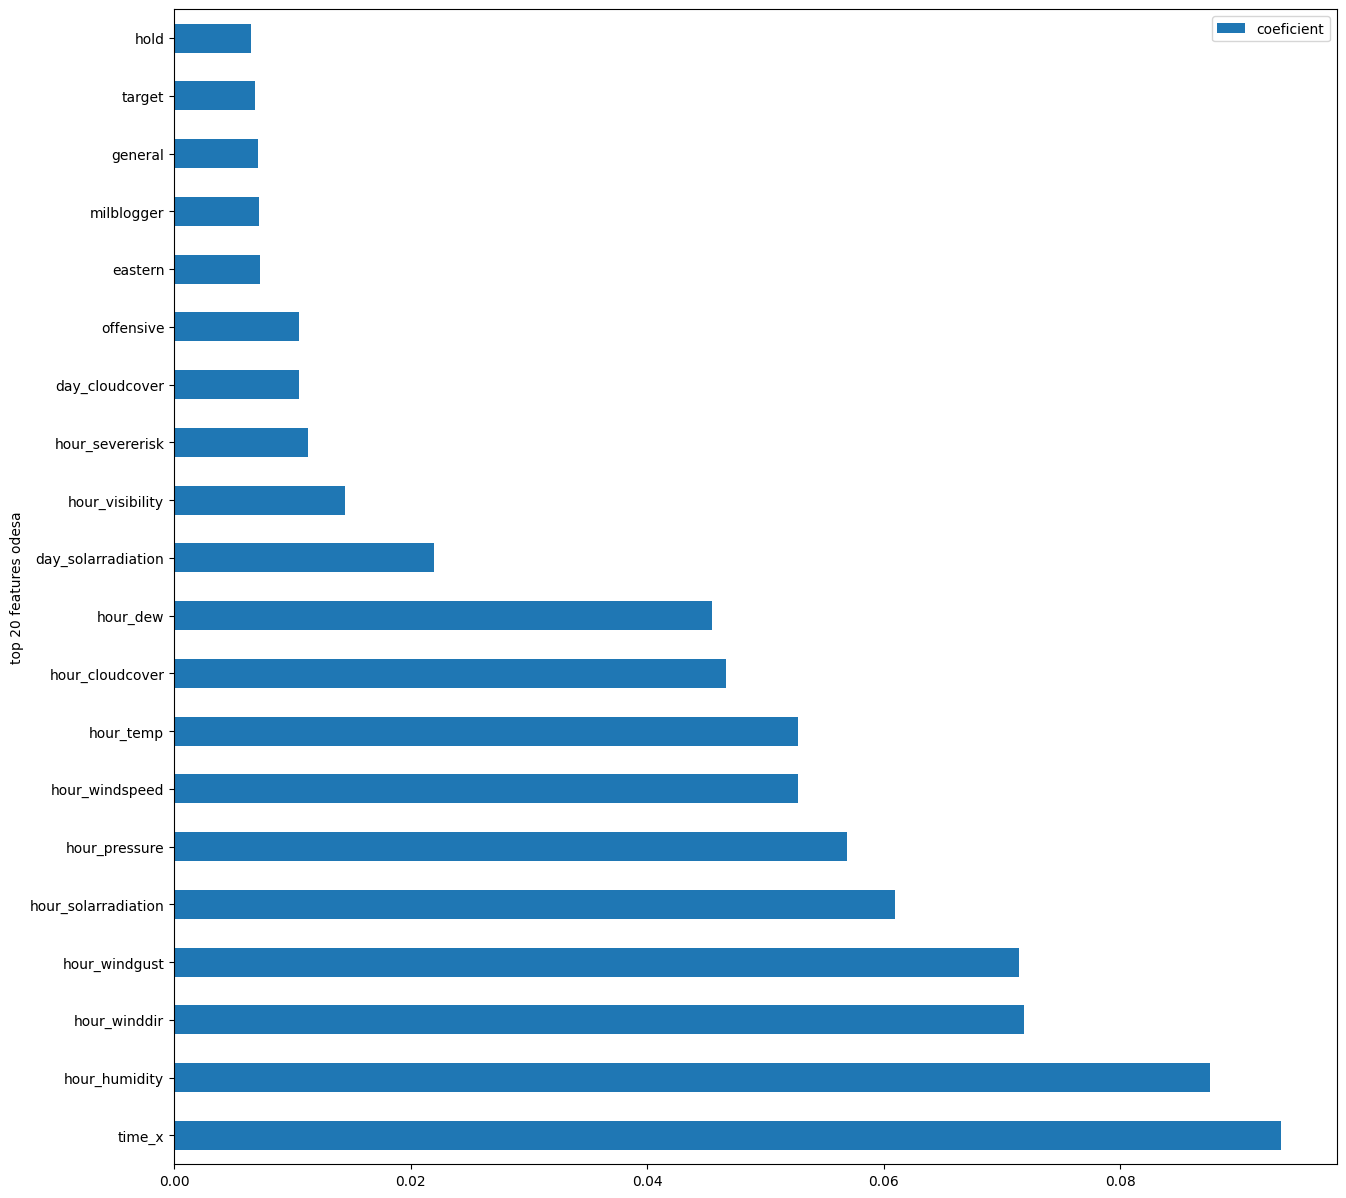

In [205]:
features_data.plot.barh(figsize=(15,15))

In [206]:
mykolaiv_data = pd.read_csv('reg14_mykolaiv.csv')
mykolaiv_data.head()

,Unnamed: 0,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_snow,day_windgust,...,date,time,day_of_week,alarm_last_2hours,alarm_last_3hours,alarm_last_4hours,alarm_in_dnipro,alarm_in_kropyvnytskyi,alarm_in_odesa,alarm_in_kherson
0,69595,8.8,0.0,4.8,-0.9,68.3,0.0,0.0,0.0,28.1,...,2022-02-24,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,69596,8.8,0.0,4.8,-0.9,68.3,0.0,0.0,0.0,28.1,...,2022-02-24,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,69597,8.8,0.0,4.8,-0.9,68.3,0.0,0.0,0.0,28.1,...,2022-02-24,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,69598,8.8,0.0,4.8,-0.9,68.3,0.0,0.0,0.0,28.1,...,2022-02-24,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,69599,8.8,0.0,4.8,-0.9,68.3,0.0,0.0,0.0,28.1,...,2022-02-24,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [207]:
train_mykolaiv = pd.merge(mykolaiv_data, tfidf_data, on='date', how='inner')

In [208]:
train_mykolaiv['date'] = pd.to_datetime(train_mykolaiv['datetime_combined'])
train_mykolaiv.set_index('datetime_combined', inplace=True)
train_mykolaiv.head()

,Unnamed: 0,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_snow,day_windgust,...,west,western,withdraw,withdrawal,within,without,would,zaporizhia,zaporizhzhia,znpp
datetime_combined,,,,,,,,,,,,,,,,,,,,,
2022-02-24 00:00:00,69595,8.8,0.0,4.8,-0.9,68.3,0.0,0.0,0.0,28.1,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0
2022-02-24 01:00:00,69596,8.8,0.0,4.8,-0.9,68.3,0.0,0.0,0.0,28.1,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0
2022-02-24 02:00:00,69597,8.8,0.0,4.8,-0.9,68.3,0.0,0.0,0.0,28.1,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0
2022-02-24 03:00:00,69598,8.8,0.0,4.8,-0.9,68.3,0.0,0.0,0.0,28.1,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0
2022-02-24 04:00:00,69599,8.8,0.0,4.8,-0.9,68.3,0.0,0.0,0.0,28.1,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0


In [209]:
columns_delete = ['Unnamed: 0', 'region_id_x', 'tf-idf', 'date', 'alarm_last_2hours', 'alarm_last_3hours', 'alarm_last_4hours', 'alarm_in_odesa', 'alarm_in_dnipro', 'alarm_in_kherson', 'alarm_in_kropyvnytskyi']
train_mykolaiv.drop(columns=columns_delete, inplace=True)

In [210]:
X = train_mykolaiv.drop(columns=['alarm'])
y = train_mykolaiv['alarm']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [211]:
clf_mykolaiv = clf.fit(X_train, y_train)

In [212]:
y_pred = clf_mykolaiv.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7324786324786324


In [213]:
target_names = ['alert', 'no alert']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       alert       0.79      0.79      0.79      1496
    no alert       0.63      0.63      0.63       844

    accuracy                           0.73      2340
   macro avg       0.71      0.71      0.71      2340
weighted avg       0.73      0.73      0.73      2340



In [214]:
train_mykolaiv_without_alert = train_mykolaiv.drop(columns=['alarm'])
coeficients = clf_mykolaiv.feature_importances_
coef_indexes = np.argsort(np.abs(coeficients))[::-1][:20]
features_names = train_mykolaiv_without_alert.columns.tolist()

In [215]:
features_data = pd.DataFrame({'top 20 features mykolaiv': [features_names[i] for i in coef_indexes],
                             'coeficient': [coeficients[i] for i in coef_indexes]})
features_data.set_index('top 20 features mykolaiv', inplace=True)

<Axes: ylabel='top 20 features mykolaiv'>

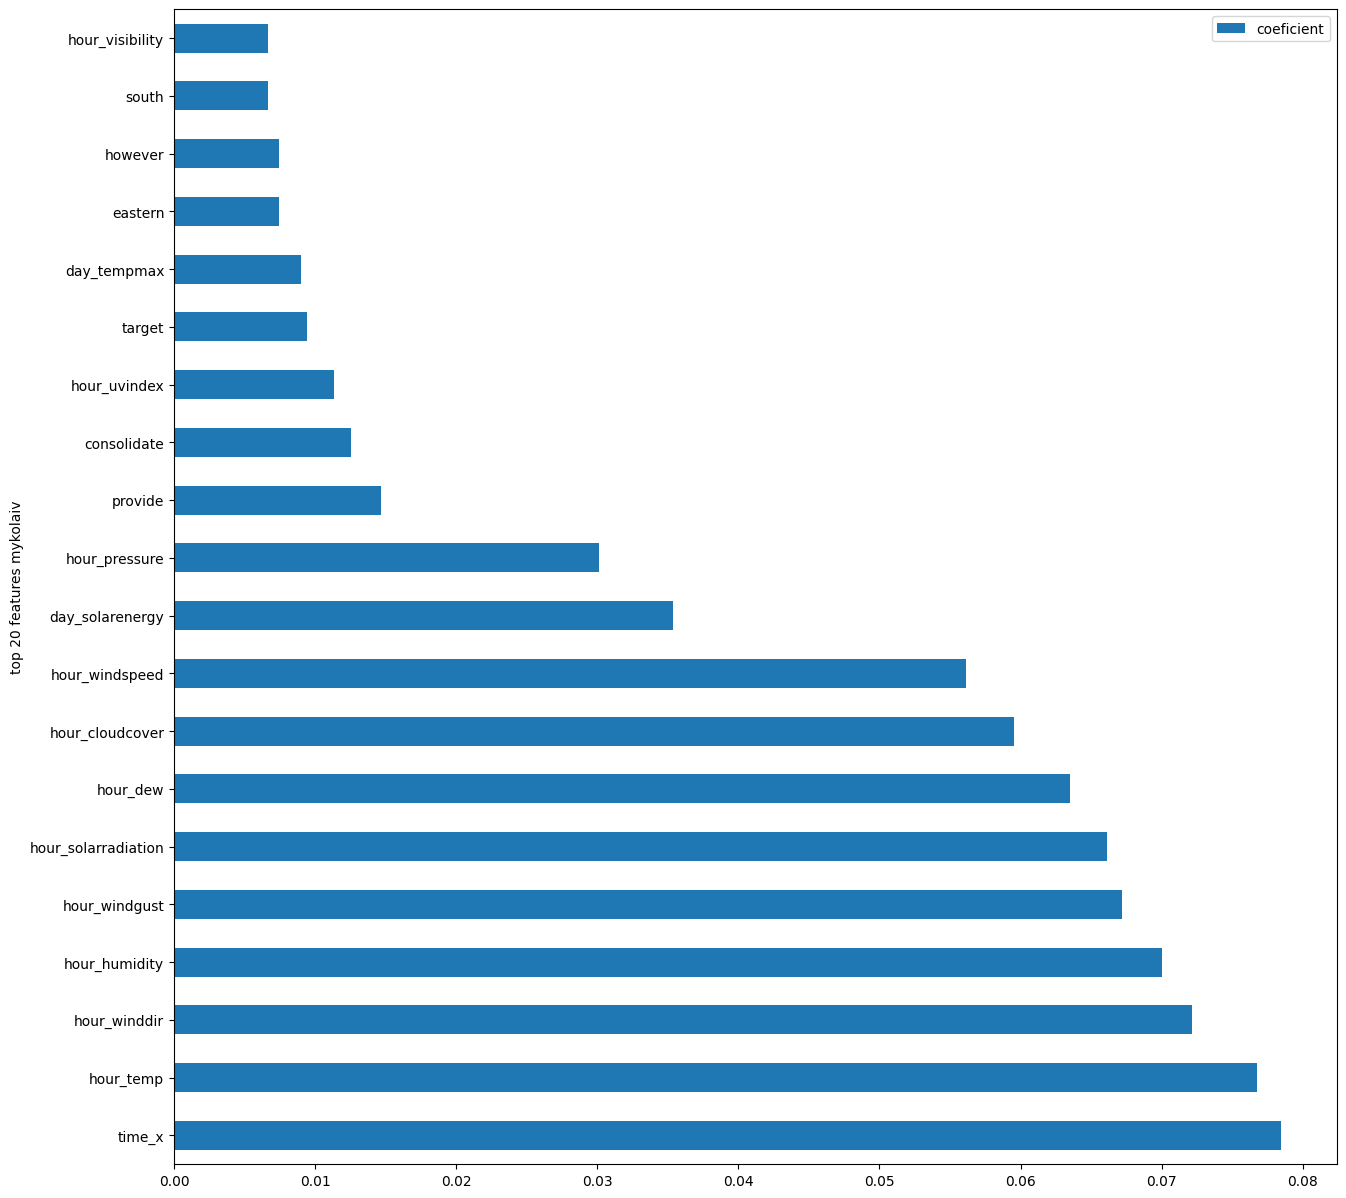

In [216]:
features_data.plot.barh(figsize=(15,15))

In [217]:
lviv_data = pd.read_csv('reg13_lviv.csv')
lviv_data.head()

,Unnamed: 0,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_snow,day_windgust,...,time,day_of_week,alarm_last_2hours,alarm_last_3hours,alarm_last_4hours,alarm_in_lutsk,alarm_in_uzhgorod,alarm_in_frankivsk,alarm_in_rivne,alarm_in_ternopil
0,154341,6.0,0.0,2.8,-1.0,76.8,0.4,4.17,0.2,43.6,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,154342,6.0,0.0,2.8,-1.0,76.8,0.4,4.17,0.2,43.6,...,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,154343,6.0,0.0,2.8,-1.0,76.8,0.4,4.17,0.2,43.6,...,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,154344,6.0,0.0,2.8,-1.0,76.8,0.4,4.17,0.2,43.6,...,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,154345,6.0,0.0,2.8,-1.0,76.8,0.4,4.17,0.2,43.6,...,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [218]:
train_lviv = pd.merge(lviv_data, tfidf_data, on='date', how='inner')

In [219]:
train_lviv['date'] = pd.to_datetime(train_lviv['datetime_combined'])
train_lviv.set_index('datetime_combined', inplace=True)
train_lviv.head()

,Unnamed: 0,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_snow,day_windgust,...,west,western,withdraw,withdrawal,within,without,would,zaporizhia,zaporizhzhia,znpp
datetime_combined,,,,,,,,,,,,,,,,,,,,,
2022-02-24 00:00:00,154341,6.0,0.0,2.8,-1.0,76.8,0.4,4.17,0.2,43.6,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0
2022-02-24 01:00:00,154342,6.0,0.0,2.8,-1.0,76.8,0.4,4.17,0.2,43.6,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0
2022-02-24 02:00:00,154343,6.0,0.0,2.8,-1.0,76.8,0.4,4.17,0.2,43.6,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0
2022-02-24 03:00:00,154344,6.0,0.0,2.8,-1.0,76.8,0.4,4.17,0.2,43.6,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0
2022-02-24 04:00:00,154345,6.0,0.0,2.8,-1.0,76.8,0.4,4.17,0.2,43.6,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0


In [220]:
columns_delete = ['Unnamed: 0', 'region_id_x', 'tf-idf', 'date', 'alarm_last_2hours', 'alarm_last_3hours', 'alarm_last_4hours', 'alarm_in_lutsk', 'alarm_in_uzhgorod', 'alarm_in_frankivsk', 'alarm_in_rivne', 'alarm_in_ternopil']
train_lviv.drop(columns=columns_delete, inplace=True)

In [221]:
X = train_lviv.drop(columns=['alarm'])
y = train_lviv['alarm']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [222]:
clf_lviv = clf.fit(X_train, y_train)

In [223]:
y_pred = clf_lviv.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9055555555555556


In [224]:
target_names = ['alert', 'no alert']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       alert       0.94      0.95      0.95      2100
    no alert       0.55      0.47      0.51       240

    accuracy                           0.91      2340
   macro avg       0.74      0.71      0.73      2340
weighted avg       0.90      0.91      0.90      2340



In [225]:
train_lviv_without_alert = train_lviv.drop(columns=['alarm'])
coeficients = clf_lviv.feature_importances_
coef_indexes = np.argsort(np.abs(coeficients))[::-1][:20]
features_names = train_lviv_without_alert.columns.tolist()

In [226]:
features_data = pd.DataFrame({'top 20 features lviv': [features_names[i] for i in coef_indexes],
                             'coeficient': [coeficients[i] for i in coef_indexes]})
features_data.set_index('top 20 features lviv', inplace=True)

<Axes: ylabel='top 20 features lviv'>

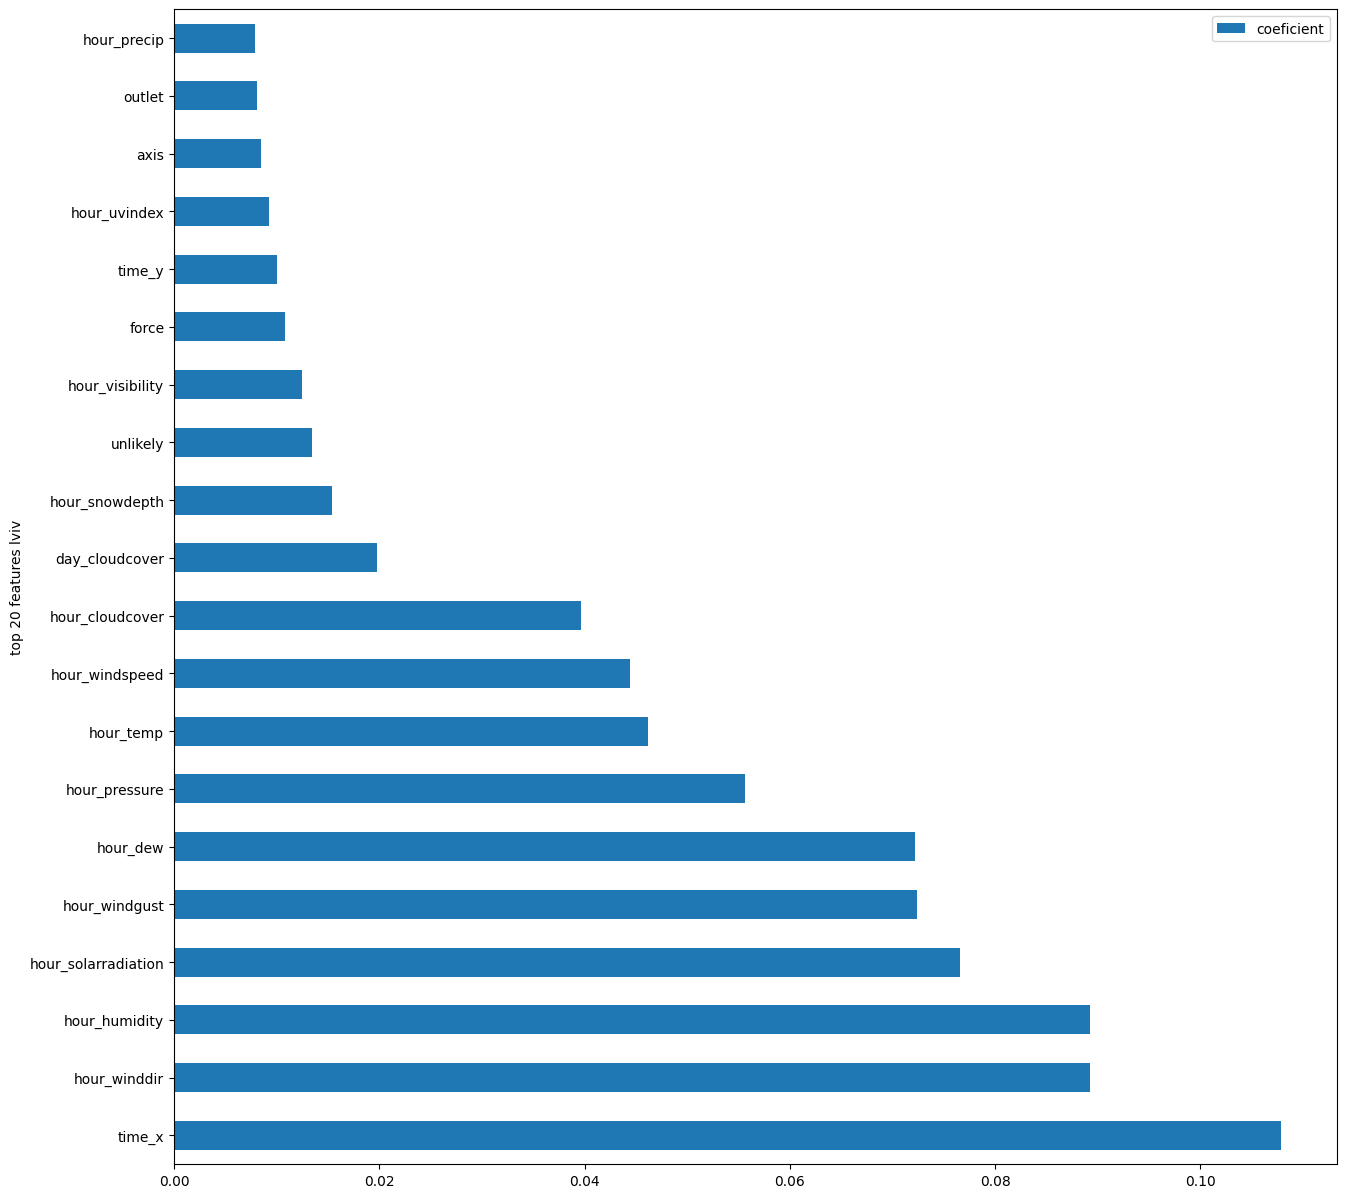

In [227]:
features_data.plot.barh(figsize=(15,15))

In [228]:
kropyvnytskyi_data = pd.read_csv('reg11_kropyvnytskyi.csv')
kropyvnytskyi_data.head()

,Unnamed: 0,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_snow,day_windgust,...,day_of_week,alarm_last_2hours,alarm_last_3hours,alarm_last_4hours,alarm_in_vinnytsia,alarm_in_dnipro,alarm_in_mykolaiv,alarm_in_odesa,alarm_in_poltava,alarm_in_cherkasy
0,8050,6.2,-1.3,2.2,-1.2,78.9,0.0,0.0,0.0,15.5,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8051,6.2,-1.3,2.2,-1.2,78.9,0.0,0.0,0.0,15.5,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8052,6.2,-1.3,2.2,-1.2,78.9,0.0,0.0,0.0,15.5,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8053,6.2,-1.3,2.2,-1.2,78.9,0.0,0.0,0.0,15.5,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8054,6.2,-1.3,2.2,-1.2,78.9,0.0,0.0,0.0,15.5,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [229]:
train_kropyvnytskyi = pd.merge(kropyvnytskyi_data, tfidf_data, on='date', how='inner')

In [230]:
train_kropyvnytskyi['date'] = pd.to_datetime(train_kropyvnytskyi['datetime_combined'])
train_kropyvnytskyi.set_index('datetime_combined', inplace=True)
train_kropyvnytskyi.head()

,Unnamed: 0,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_snow,day_windgust,...,west,western,withdraw,withdrawal,within,without,would,zaporizhia,zaporizhzhia,znpp
datetime_combined,,,,,,,,,,,,,,,,,,,,,
2022-02-24 00:00:00,8050,6.2,-1.3,2.2,-1.2,78.9,0.0,0.0,0.0,15.5,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0
2022-02-24 01:00:00,8051,6.2,-1.3,2.2,-1.2,78.9,0.0,0.0,0.0,15.5,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0
2022-02-24 02:00:00,8052,6.2,-1.3,2.2,-1.2,78.9,0.0,0.0,0.0,15.5,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0
2022-02-24 03:00:00,8053,6.2,-1.3,2.2,-1.2,78.9,0.0,0.0,0.0,15.5,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0
2022-02-24 04:00:00,8054,6.2,-1.3,2.2,-1.2,78.9,0.0,0.0,0.0,15.5,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0


In [232]:
columns_delete = ['Unnamed: 0', 'region_id_x', 'tf-idf', 'date', 'alarm_last_2hours', 'alarm_last_3hours', 'alarm_last_4hours', 'alarm_in_vinnytsia', 'alarm_in_dnipro', 'alarm_in_mykolaiv', 'alarm_in_odesa', 'alarm_in_cherkasy', 'alarm_in_poltava']
train_kropyvnytskyi.drop(columns=columns_delete, inplace=True)

In [233]:
X = train_kropyvnytskyi.drop(columns=['alarm'])
y = train_kropyvnytskyi['alarm']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [234]:
clf_kropyvnytskyi = clf.fit(X_train, y_train)

In [235]:
y_pred = clf_kropyvnytskyi.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7401709401709402


In [236]:
target_names = ['alert', 'no alert']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       alert       0.81      0.81      0.81      1587
    no alert       0.60      0.60      0.60       753

    accuracy                           0.74      2340
   macro avg       0.70      0.70      0.70      2340
weighted avg       0.74      0.74      0.74      2340



In [237]:
train_kropyvnytskyi_without_alert = train_kropyvnytskyi.drop(columns=['alarm'])
coeficients = clf_kropyvnytskyi.feature_importances_
coef_indexes = np.argsort(np.abs(coeficients))[::-1][:20]
features_names = train_kropyvnytskyi_without_alert.columns.tolist()

In [238]:
features_data = pd.DataFrame({'top 20 features kropyvnytskyi': [features_names[i] for i in coef_indexes],
                             'coeficient': [coeficients[i] for i in coef_indexes]})
features_data.set_index('top 20 features kropyvnytskyi', inplace=True)

<Axes: ylabel='top 20 features kropyvnytskyi'>

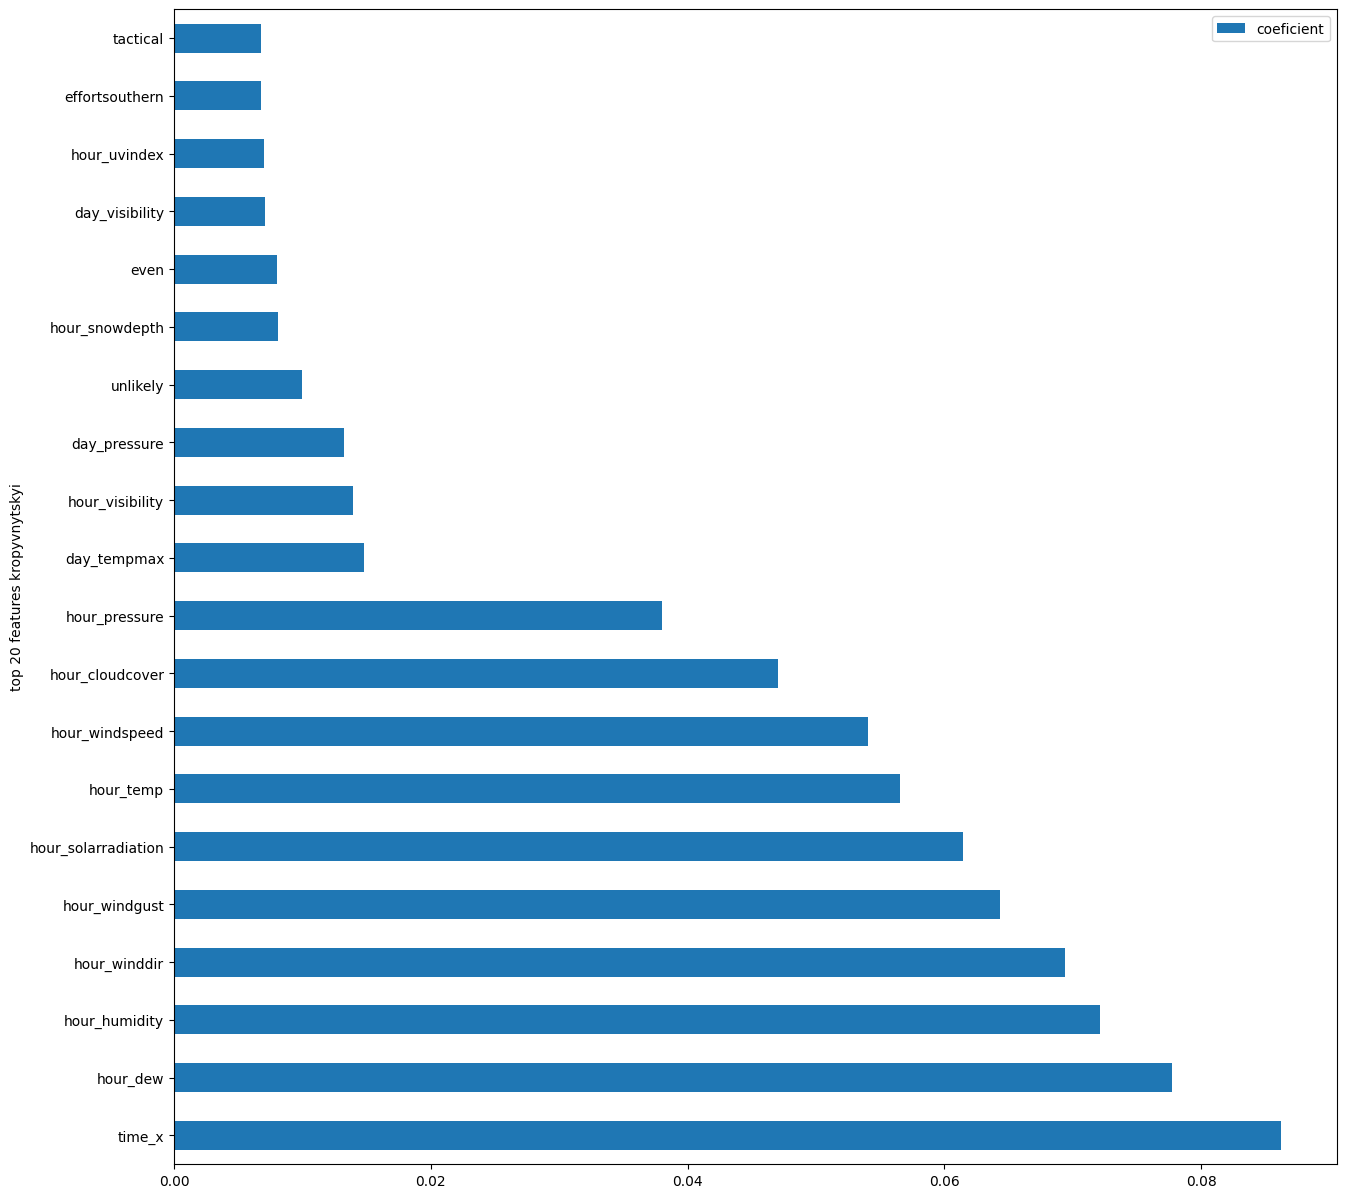

In [239]:
features_data.plot.barh(figsize=(15,15))

In [240]:
kyiv_data = pd.read_csv('reg10_kyiv.csv')
kyiv_data.head()

,Unnamed: 0,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_snow,day_windgust,...,time,day_of_week,alarm_last_2hours,alarm_last_3hours,alarm_last_4hours,alarm_in_vinnytsia,alarm_in_zhytomyr,alarm_in_poltava,alarm_in_cherkasy,alarm_in_chernihiv
0,25866,5.3,1.9,2.9,1.2,88.9,0.1,4.17,0.0,28.8,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,25867,5.3,1.9,2.9,1.2,88.9,0.1,4.17,0.0,28.8,...,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,25868,5.3,1.9,2.9,1.2,88.9,0.1,4.17,0.0,28.8,...,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,25869,5.3,1.9,2.9,1.2,88.9,0.1,4.17,0.0,28.8,...,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,25870,5.3,1.9,2.9,1.2,88.9,0.1,4.17,0.0,28.8,...,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [241]:
train_kyiv = pd.merge(kyiv_data, tfidf_data, on='date', how='inner')

In [242]:
train_kyiv['date'] = pd.to_datetime(train_kyiv['datetime_combined'])
train_kyiv.set_index('datetime_combined', inplace=True)
train_kyiv.head()

,Unnamed: 0,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_snow,day_windgust,...,west,western,withdraw,withdrawal,within,without,would,zaporizhia,zaporizhzhia,znpp
datetime_combined,,,,,,,,,,,,,,,,,,,,,
2022-02-24 00:00:00,25866,5.3,1.9,2.9,1.2,88.9,0.1,4.17,0.0,28.8,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0
2022-02-24 01:00:00,25867,5.3,1.9,2.9,1.2,88.9,0.1,4.17,0.0,28.8,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0
2022-02-24 02:00:00,25868,5.3,1.9,2.9,1.2,88.9,0.1,4.17,0.0,28.8,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0
2022-02-24 03:00:00,25869,5.3,1.9,2.9,1.2,88.9,0.1,4.17,0.0,28.8,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0
2022-02-24 04:00:00,25870,5.3,1.9,2.9,1.2,88.9,0.1,4.17,0.0,28.8,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0


In [243]:
columns_delete = ['Unnamed: 0', 'region_id_x', 'tf-idf', 'date', 'alarm_last_2hours', 'alarm_last_3hours', 'alarm_last_4hours', 'alarm_in_vinnytsia', 'alarm_in_zhytomyr', 'alarm_in_cherkasy', 'alarm_in_chernihiv', 'alarm_in_cherkasy', 'alarm_in_poltava']
train_kyiv.drop(columns=columns_delete, inplace=True)

In [244]:
X = train_kyiv.drop(columns=['alarm'])
y = train_kyiv['alarm']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [245]:
clf_kyiv = clf.fit(X_train, y_train)

In [246]:
y_pred = clf_kyiv.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8175213675213675


In [247]:
target_names = ['alert', 'no alert']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       alert       0.88      0.88      0.88      1771
    no alert       0.63      0.61      0.62       569

    accuracy                           0.82      2340
   macro avg       0.75      0.75      0.75      2340
weighted avg       0.82      0.82      0.82      2340



In [248]:
train_kyiv_without_alert = train_kyiv.drop(columns=['alarm'])
coeficients = clf_kyiv.feature_importances_
coef_indexes = np.argsort(np.abs(coeficients))[::-1][:20]
features_names = train_kyiv_without_alert.columns.tolist()

In [249]:
features_data = pd.DataFrame({'top 20 features kyiv': [features_names[i] for i in coef_indexes],
                             'coeficient': [coeficients[i] for i in coef_indexes]})
features_data.set_index('top 20 features kyiv', inplace=True)

<Axes: ylabel='top 20 features kyiv'>

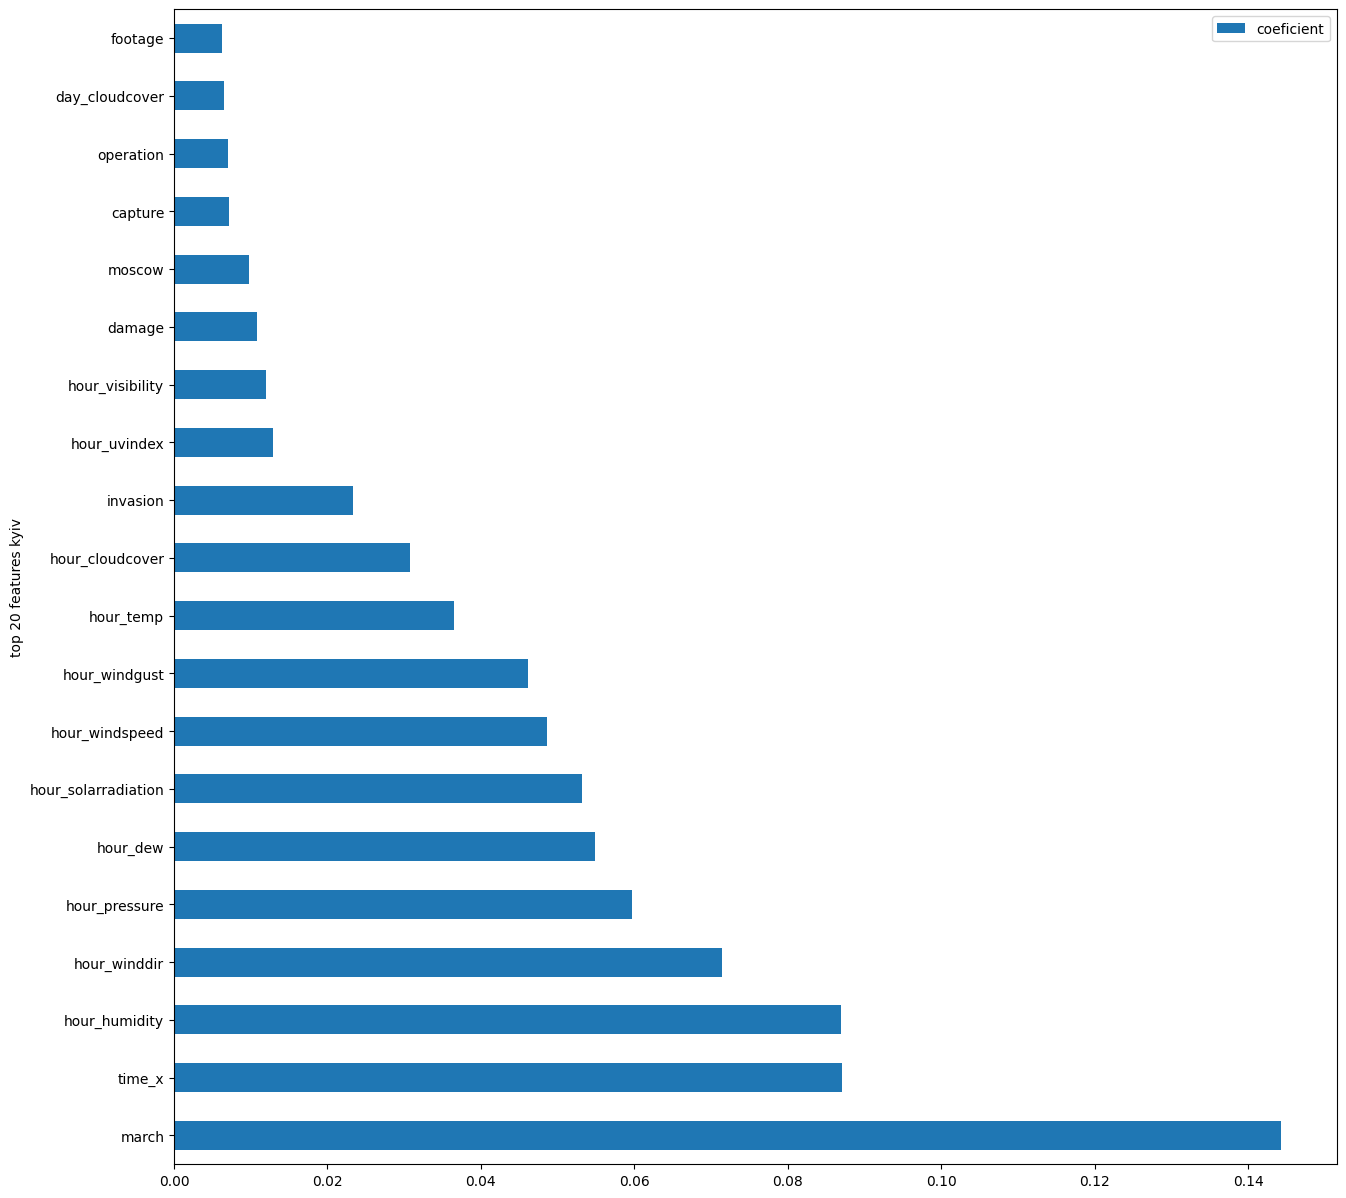

In [250]:
features_data.plot.barh(figsize=(15,15))

In [251]:
frankivsk_data = pd.read_csv('reg9_frankivsk.csv')
frankivsk_data.head()

,Unnamed: 0,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_snow,day_windgust,...,date,time,day_of_week,alarm_last_2hours,alarm_last_3hours,alarm_last_4hours,alarm_in_uzhgorod,alarm_in_lviv,alarm_in_ternopil,alarm_in_chernivtsi
0,162400,5.7,0.1,2.7,-1.4,75.2,0.8,12.5,0.1,46.1,...,2022-02-24,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,162401,5.7,0.1,2.7,-1.4,75.2,0.8,12.5,0.1,46.1,...,2022-02-24,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,162402,5.7,0.1,2.7,-1.4,75.2,0.8,12.5,0.1,46.1,...,2022-02-24,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,162403,5.7,0.1,2.7,-1.4,75.2,0.8,12.5,0.1,46.1,...,2022-02-24,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,162404,5.7,0.1,2.7,-1.4,75.2,0.8,12.5,0.1,46.1,...,2022-02-24,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [252]:
train_frankivsk = pd.merge(frankivsk_data, tfidf_data, on='date', how='inner')

In [253]:
train_frankivsk['date'] = pd.to_datetime(train_frankivsk['datetime_combined'])
train_frankivsk.set_index('datetime_combined', inplace=True)
train_frankivsk.head()

,Unnamed: 0,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_snow,day_windgust,...,west,western,withdraw,withdrawal,within,without,would,zaporizhia,zaporizhzhia,znpp
datetime_combined,,,,,,,,,,,,,,,,,,,,,
2022-02-24 00:00:00,162400,5.7,0.1,2.7,-1.4,75.2,0.8,12.5,0.1,46.1,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0
2022-02-24 01:00:00,162401,5.7,0.1,2.7,-1.4,75.2,0.8,12.5,0.1,46.1,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0
2022-02-24 02:00:00,162402,5.7,0.1,2.7,-1.4,75.2,0.8,12.5,0.1,46.1,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0
2022-02-24 03:00:00,162403,5.7,0.1,2.7,-1.4,75.2,0.8,12.5,0.1,46.1,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0
2022-02-24 04:00:00,162404,5.7,0.1,2.7,-1.4,75.2,0.8,12.5,0.1,46.1,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0


In [255]:
columns_delete = ['Unnamed: 0', 'region_id_x', 'tf-idf', 'date', 'alarm_last_2hours', 'alarm_last_3hours', 'alarm_last_4hours', 'alarm_in_uzhgorod', 'alarm_in_lviv', 'alarm_in_ternopil', 'alarm_in_chernivtsi']
train_frankivsk.drop(columns=columns_delete, inplace=True)

In [257]:
X = train_frankivsk.drop(columns=['alarm'])
y = train_frankivsk['alarm']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [258]:
clf_frankivsk = clf.fit(X_train, y_train)

In [259]:
y_pred = clf_frankivsk.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8961538461538462


In [260]:
target_names = ['alert', 'no alert']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       alert       0.94      0.95      0.94      2103
    no alert       0.49      0.45      0.47       237

    accuracy                           0.90      2340
   macro avg       0.71      0.70      0.71      2340
weighted avg       0.89      0.90      0.89      2340



In [261]:
train_frankivsk_without_alert = train_frankivsk.drop(columns=['alarm'])
coeficients = clf_frankivsk.feature_importances_
coef_indexes = np.argsort(np.abs(coeficients))[::-1][:20]
features_names = train_frankivsk_without_alert.columns.tolist()

In [262]:
features_data = pd.DataFrame({'top 20 features frankivsk': [features_names[i] for i in coef_indexes],
                             'coeficient': [coeficients[i] for i in coef_indexes]})
features_data.set_index('top 20 features frankivsk', inplace=True)

<Axes: ylabel='top 20 features frankivsk'>

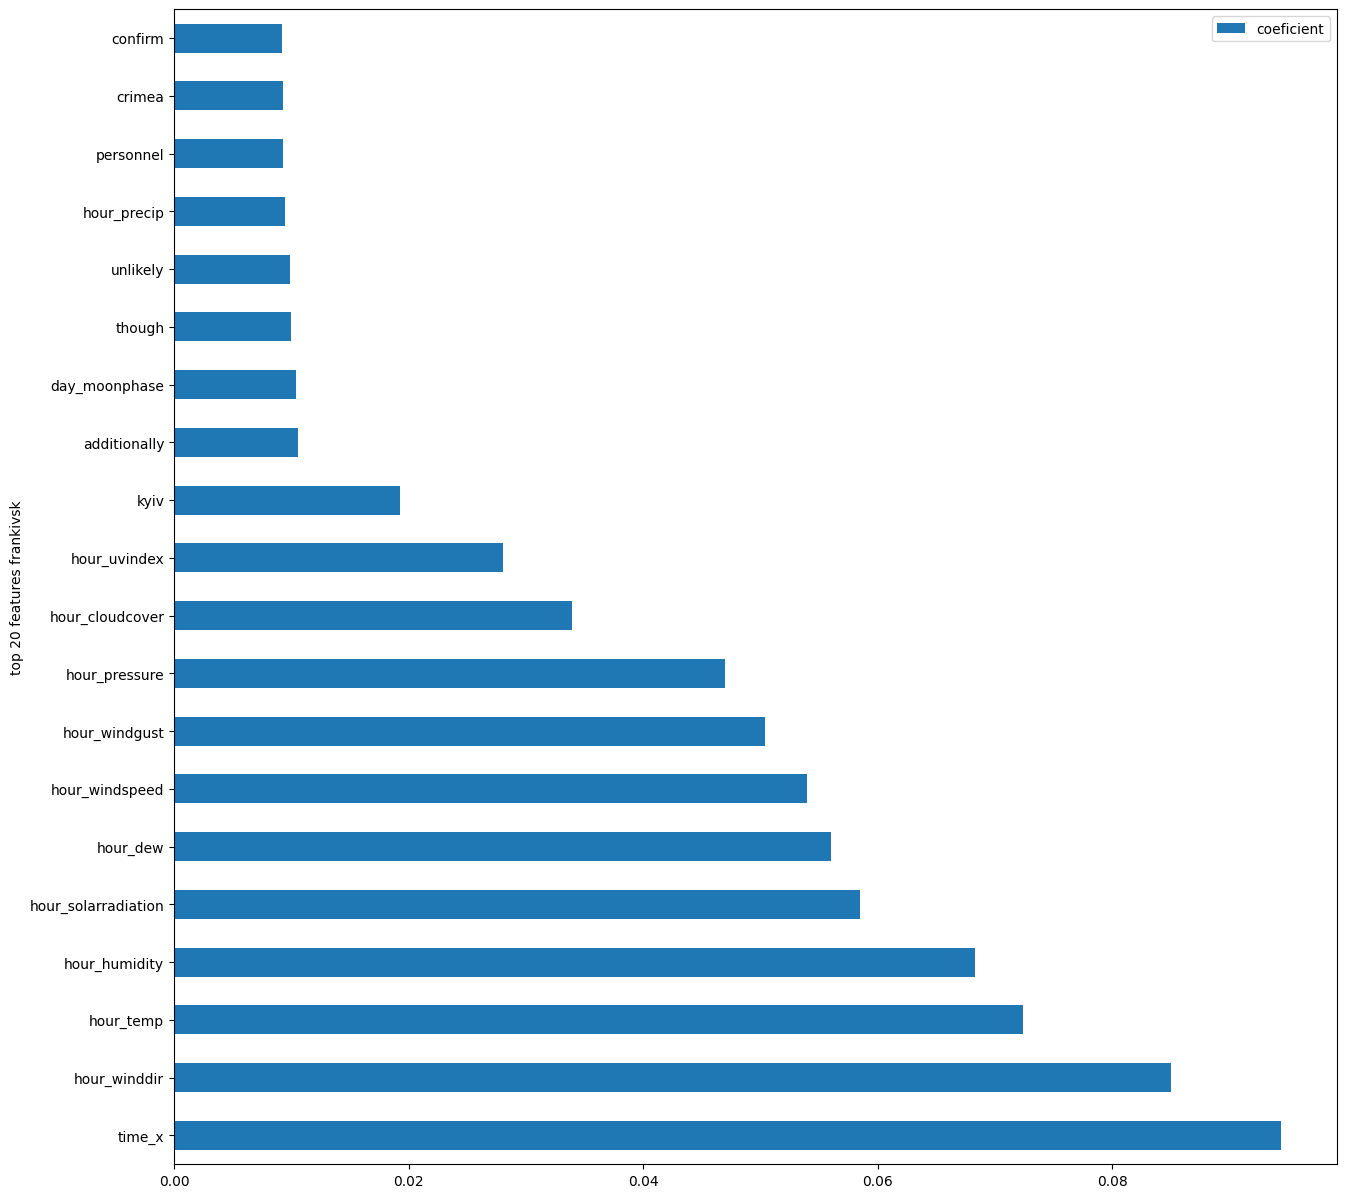

In [263]:
features_data.plot.barh(figsize=(15,15))

In [264]:
zaporizhzhia_data = pd.read_csv('reg8_zaporizhya.csv')
zaporizhzhia_data.head()

,Unnamed: 0,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_snow,day_windgust,...,datetime_combined,date,time,day_of_week,alarm_last_2hours,alarm_last_3hours,alarm_last_4hours,alarm_in_dnipro,alarm_in_donetsk,alarm_in_kherson
0,112618,8.0,-2.0,3.3,-2.1,69.5,0.0,0.0,0.0,36.4,...,2022-02-24 00:00:00,2022-02-24,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
1,112619,8.0,-2.0,3.3,-2.1,69.5,0.0,0.0,0.0,36.4,...,2022-02-24 01:00:00,2022-02-24,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
2,112620,8.0,-2.0,3.3,-2.1,69.5,0.0,0.0,0.0,36.4,...,2022-02-24 02:00:00,2022-02-24,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
3,112621,8.0,-2.0,3.3,-2.1,69.5,0.0,0.0,0.0,36.4,...,2022-02-24 03:00:00,2022-02-24,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
4,112622,8.0,-2.0,3.3,-2.1,69.5,0.0,0.0,0.0,36.4,...,2022-02-24 04:00:00,2022-02-24,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [265]:
train_zaporizhzhia = pd.merge(zaporizhzhia_data, tfidf_data, on='date', how='inner')

In [267]:
train_zaporizhzhia['date'] = pd.to_datetime(train_zaporizhzhia['datetime_combined'])
train_zaporizhzhia.set_index('datetime_combined', inplace=True)
train_zaporizhzhia.head()

,Unnamed: 0,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_snow,day_windgust,...,west,western,withdraw,withdrawal,within,without,would,zaporizhia,zaporizhzhia,znpp
datetime_combined,,,,,,,,,,,,,,,,,,,,,
2022-02-24 00:00:00,112618,8.0,-2.0,3.3,-2.1,69.5,0.0,0.0,0.0,36.4,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0
2022-02-24 01:00:00,112619,8.0,-2.0,3.3,-2.1,69.5,0.0,0.0,0.0,36.4,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0
2022-02-24 02:00:00,112620,8.0,-2.0,3.3,-2.1,69.5,0.0,0.0,0.0,36.4,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0
2022-02-24 03:00:00,112621,8.0,-2.0,3.3,-2.1,69.5,0.0,0.0,0.0,36.4,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0
2022-02-24 04:00:00,112622,8.0,-2.0,3.3,-2.1,69.5,0.0,0.0,0.0,36.4,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0


In [269]:
columns_delete = ['Unnamed: 0', 'region_id_x', 'tf-idf', 'date', 'alarm_last_2hours', 'alarm_last_3hours', 'alarm_last_4hours', 'alarm_in_dnipro', 'alarm_in_donetsk', 'alarm_in_kherson']
train_zaporizhzhia.drop(columns=columns_delete, inplace=True)

In [270]:
X = train_zaporizhzhia.drop(columns=['alarm'])
y = train_zaporizhzhia['alarm']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf_zaporizhzhia = clf.fit(X_train, y_train)
y_pred = clf_zaporizhzhia.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6820512820512821


In [271]:
target_names = ['alert', 'no alert']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       alert       0.74      0.74      0.74      1421
    no alert       0.60      0.59      0.59       919

    accuracy                           0.68      2340
   macro avg       0.67      0.66      0.67      2340
weighted avg       0.68      0.68      0.68      2340



In [272]:
train_zaporizhzhia_without_alert = train_zaporizhzhia.drop(columns=['alarm'])
coeficients = clf_zaporizhzhia.feature_importances_
coef_indexes = np.argsort(np.abs(coeficients))[::-1][:20]
features_names = train_zaporizhzhia_without_alert.columns.tolist()

<Axes: ylabel='top 20 features zaporizhzhia'>

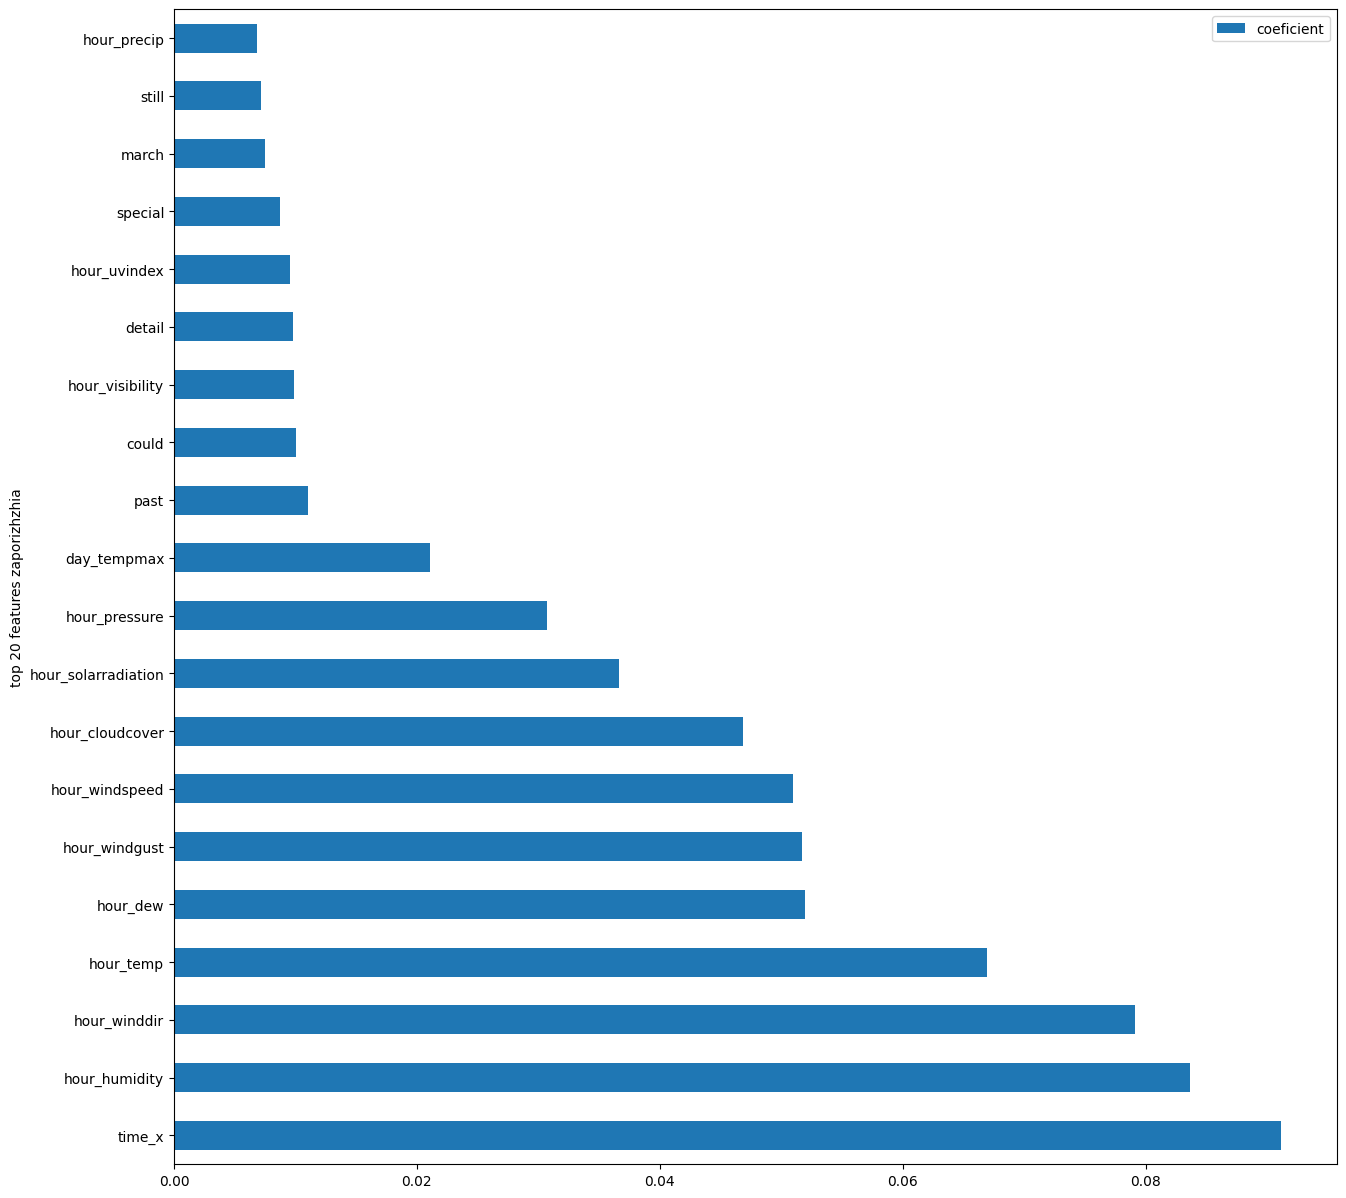

In [273]:
features_data = pd.DataFrame({'top 20 features zaporizhzhia': [features_names[i] for i in coef_indexes],
                             'coeficient': [coeficients[i] for i in coef_indexes]})
features_data.set_index('top 20 features zaporizhzhia', inplace=True)
features_data.plot.barh(figsize=(15,15))

In [274]:
uzhgorod_data = pd.read_csv('reg7_uzhgorod.csv')
uzhgorod_data.head()

,Unnamed: 0,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_snow,day_windgust,...,alarm,datetime_combined,date,time,day_of_week,alarm_last_2hours,alarm_last_3hours,alarm_last_4hours,alarm_in_frankivsk,alarm_in_lviv
0,104648,6.7,-2.4,1.8,-1.6,79.9,0.0,0.0,0.0,24.1,...,0.0,2022-02-24 00:00:00,2022-02-24,0.0,3.0,0.0,0.0,0.0,0.0,0.0
1,104649,6.7,-2.4,1.8,-1.6,79.9,0.0,0.0,0.0,24.1,...,0.0,2022-02-24 01:00:00,2022-02-24,1.0,3.0,0.0,0.0,0.0,0.0,0.0
2,104650,6.7,-2.4,1.8,-1.6,79.9,0.0,0.0,0.0,24.1,...,0.0,2022-02-24 02:00:00,2022-02-24,2.0,3.0,0.0,0.0,0.0,0.0,0.0
3,104651,6.7,-2.4,1.8,-1.6,79.9,0.0,0.0,0.0,24.1,...,0.0,2022-02-24 03:00:00,2022-02-24,3.0,3.0,0.0,0.0,0.0,0.0,0.0
4,104652,6.7,-2.4,1.8,-1.6,79.9,0.0,0.0,0.0,24.1,...,0.0,2022-02-24 04:00:00,2022-02-24,4.0,3.0,0.0,0.0,0.0,0.0,0.0


In [275]:
train_uzhgorod = pd.merge(uzhgorod_data, tfidf_data, on='date', how='inner')

In [276]:
train_uzhgorod['date'] = pd.to_datetime(train_uzhgorod['datetime_combined'])
train_uzhgorod.set_index('datetime_combined', inplace=True)
train_uzhgorod.head()

,Unnamed: 0,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_snow,day_windgust,...,west,western,withdraw,withdrawal,within,without,would,zaporizhia,zaporizhzhia,znpp
datetime_combined,,,,,,,,,,,,,,,,,,,,,
2022-02-24 00:00:00,104648,6.7,-2.4,1.8,-1.6,79.9,0.0,0.0,0.0,24.1,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0
2022-02-24 01:00:00,104649,6.7,-2.4,1.8,-1.6,79.9,0.0,0.0,0.0,24.1,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0
2022-02-24 02:00:00,104650,6.7,-2.4,1.8,-1.6,79.9,0.0,0.0,0.0,24.1,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0
2022-02-24 03:00:00,104651,6.7,-2.4,1.8,-1.6,79.9,0.0,0.0,0.0,24.1,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0
2022-02-24 04:00:00,104652,6.7,-2.4,1.8,-1.6,79.9,0.0,0.0,0.0,24.1,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0


In [277]:
columns_delete = ['Unnamed: 0', 'region_id_x', 'tf-idf', 'date', 'alarm_last_2hours', 'alarm_last_3hours', 'alarm_last_4hours', 'alarm_in_lviv', 'alarm_in_frankivsk']
train_uzhgorod.drop(columns=columns_delete, inplace=True)

In [278]:
X = train_uzhgorod.drop(columns=['alarm'])
y = train_uzhgorod['alarm']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf_uzhgorod = clf.fit(X_train, y_train)
y_pred = clf_uzhgorod.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9128205128205128


In [279]:
target_names = ['alert', 'no alert']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       alert       0.95      0.95      0.95      2143
    no alert       0.48      0.46      0.47       197

    accuracy                           0.91      2340
   macro avg       0.72      0.71      0.71      2340
weighted avg       0.91      0.91      0.91      2340



In [280]:
train_uzhgorod_without_alert = train_uzhgorod.drop(columns=['alarm'])
coeficients = clf_uzhgorod.feature_importances_
coef_indexes = np.argsort(np.abs(coeficients))[::-1][:20]
features_names = train_uzhgorod_without_alert.columns.tolist()

<Axes: ylabel='top 20 features uzhgorod'>

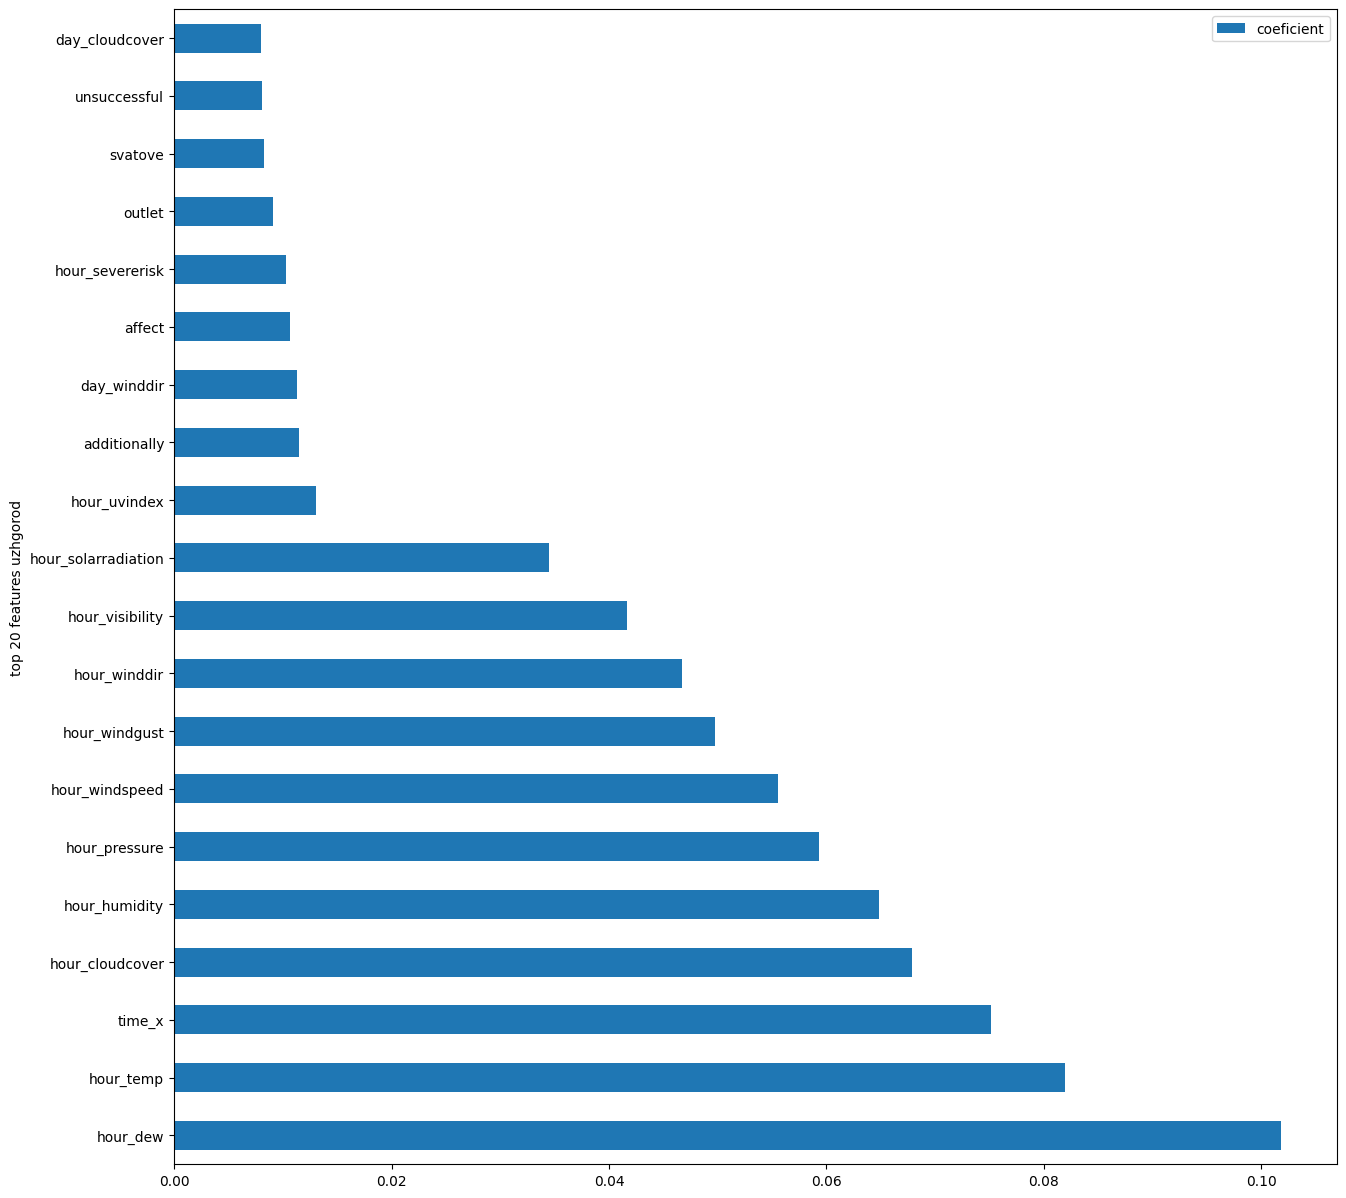

In [281]:
features_data = pd.DataFrame({'top 20 features uzhgorod': [features_names[i] for i in coef_indexes],
                             'coeficient': [coeficients[i] for i in coef_indexes]})
features_data.set_index('top 20 features uzhgorod', inplace=True)
features_data.plot.barh(figsize=(15,15))

In [282]:
donetsk_data = pd.read_csv('reg5_donetsk.csv')
donetsk_data.head()

,Unnamed: 0,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_snow,day_windgust,...,datetime_combined,date,time,day_of_week,alarm_last_2hours,alarm_last_3hours,alarm_last_4hours,alarm_in_dnipro,alarm_in_zaporizhya,alarm_in_kharkiv
0,96704,5.6,1.9,3.6,0.7,81.0,1.3,20.83,0.0,41.4,...,2022-02-24 00:00:00,2022-02-24,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
1,96705,5.6,1.9,3.6,0.7,81.0,1.3,20.83,0.0,41.4,...,2022-02-24 01:00:00,2022-02-24,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
2,96706,5.6,1.9,3.6,0.7,81.0,1.3,20.83,0.0,41.4,...,2022-02-24 02:00:00,2022-02-24,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
3,96707,5.6,1.9,3.6,0.7,81.0,1.3,20.83,0.0,41.4,...,2022-02-24 03:00:00,2022-02-24,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
4,96708,5.6,1.9,3.6,0.7,81.0,1.3,20.83,0.0,41.4,...,2022-02-24 04:00:00,2022-02-24,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [283]:
train_donetsk = pd.merge(donetsk_data, tfidf_data, on='date', how='inner')

In [284]:
train_donetsk['date'] = pd.to_datetime(train_donetsk['datetime_combined'])
train_donetsk.set_index('datetime_combined', inplace=True)
train_donetsk.head()

,Unnamed: 0,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_snow,day_windgust,...,west,western,withdraw,withdrawal,within,without,would,zaporizhia,zaporizhzhia,znpp
datetime_combined,,,,,,,,,,,,,,,,,,,,,
2022-02-24 00:00:00,96704,5.6,1.9,3.6,0.7,81.0,1.3,20.83,0.0,41.4,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0
2022-02-24 01:00:00,96705,5.6,1.9,3.6,0.7,81.0,1.3,20.83,0.0,41.4,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0
2022-02-24 02:00:00,96706,5.6,1.9,3.6,0.7,81.0,1.3,20.83,0.0,41.4,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0
2022-02-24 03:00:00,96707,5.6,1.9,3.6,0.7,81.0,1.3,20.83,0.0,41.4,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0
2022-02-24 04:00:00,96708,5.6,1.9,3.6,0.7,81.0,1.3,20.83,0.0,41.4,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0


In [286]:
columns_delete = ['Unnamed: 0', 'region_id_x', 'tf-idf', 'date', 'alarm_last_2hours', 'alarm_last_3hours', 'alarm_last_4hours', 'alarm_in_dnipro', 'alarm_in_zaporizhya', 'alarm_in_kharkiv']
train_donetsk.drop(columns=columns_delete, inplace=True)

In [287]:
X = train_donetsk.drop(columns=['alarm'])
y = train_donetsk['alarm']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf_donetsk = clf.fit(X_train, y_train)
y_pred = clf_donetsk.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [289]:
target_names = ['alert']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       alert       1.00      1.00      1.00      2340

    accuracy                           1.00      2340
   macro avg       1.00      1.00      1.00      2340
weighted avg       1.00      1.00      1.00      2340



In [290]:
train_donetsk_without_alert = train_donetsk.drop(columns=['alarm'])
coeficients = clf_donetsk.feature_importances_
coef_indexes = np.argsort(np.abs(coeficients))[::-1][:20]
features_names = train_donetsk_without_alert.columns.tolist()

<Axes: ylabel='top 20 features donetsk'>

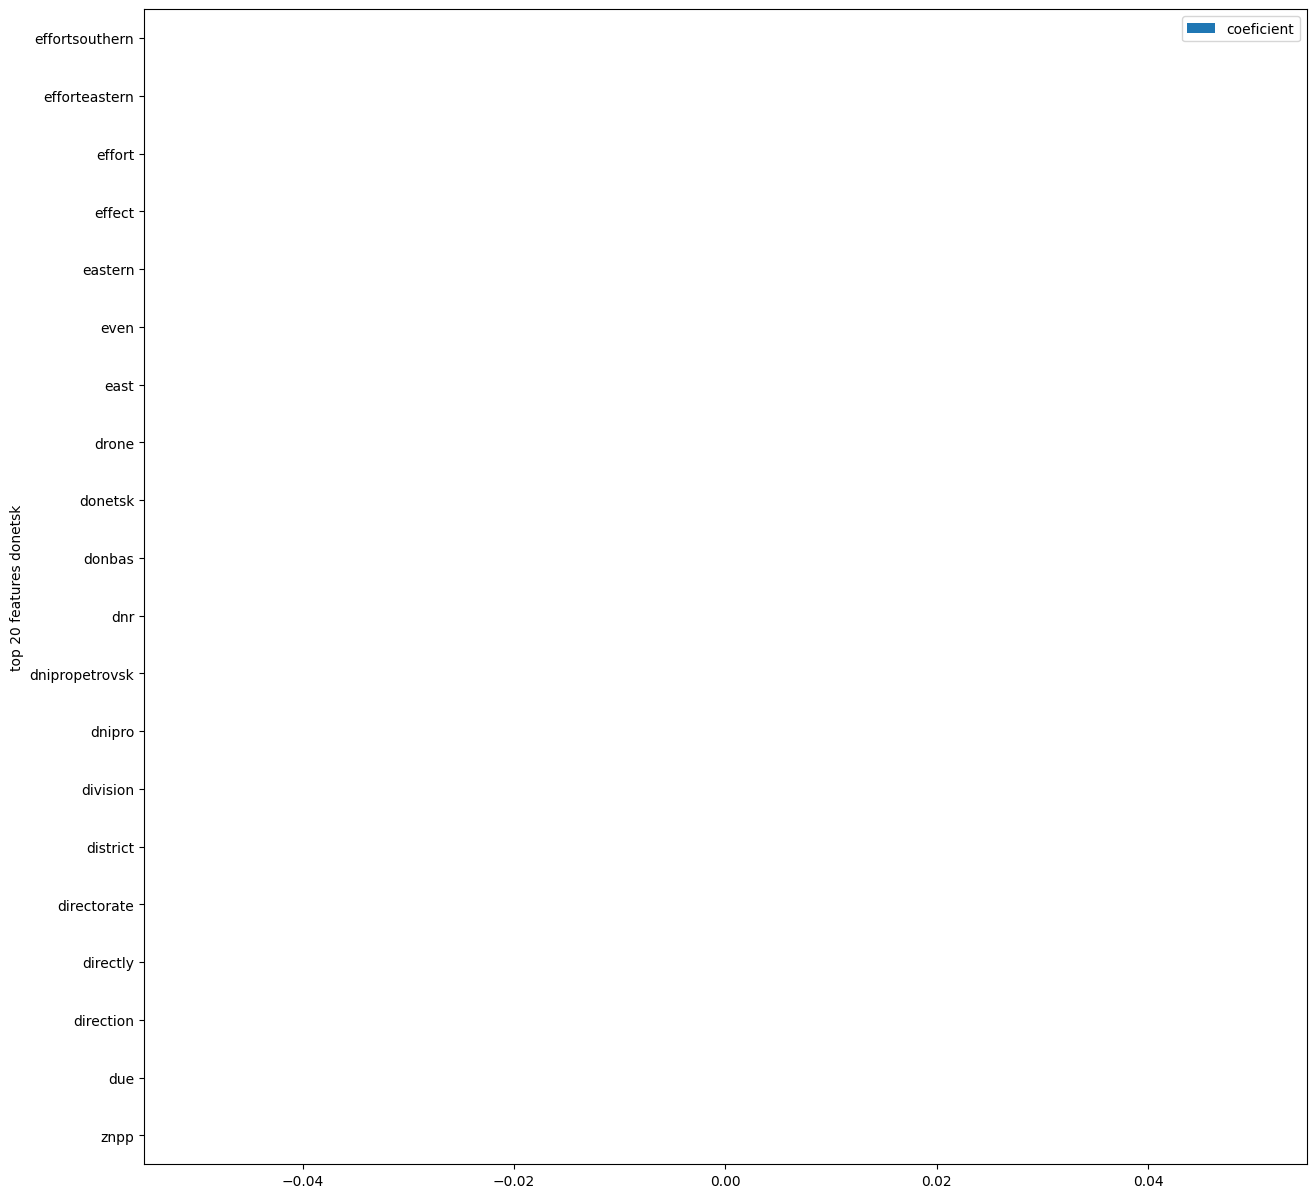

In [291]:
features_data = pd.DataFrame({'top 20 features donetsk': [features_names[i] for i in coef_indexes],
                             'coeficient': [coeficients[i] for i in coef_indexes]})
features_data.set_index('top 20 features donetsk', inplace=True)
features_data.plot.barh(figsize=(15,15))

In [292]:
dnipro_data = pd.read_csv('reg4_dnipro.csv')
dnipro_data.head()

,Unnamed: 0,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_snow,day_windgust,...,alarm_last_2hours,alarm_last_3hours,alarm_last_4hours,alarm_in_donetsk,alarm_in_zaporizhya,alarm_in_kropyvnytskyi,alarm_in_mykolaiv,alarm_in_poltava,alarm_in_kharkiv,alarm_in_kherson
0,16643,8.0,-2.0,3.1,-2.2,70.6,0.0,0.0,0.0,28.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,16644,8.0,-2.0,3.1,-2.2,70.6,0.0,0.0,0.0,28.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,16645,8.0,-2.0,3.1,-2.2,70.6,0.0,0.0,0.0,28.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,16646,8.0,-2.0,3.1,-2.2,70.6,0.0,0.0,0.0,28.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,16647,8.0,-2.0,3.1,-2.2,70.6,0.0,0.0,0.0,28.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [293]:
train_dnipro = pd.merge(dnipro_data, tfidf_data, on='date', how='inner')

In [294]:
train_dnipro['date'] = pd.to_datetime(train_dnipro['datetime_combined'])
train_dnipro.set_index('datetime_combined', inplace=True)
train_dnipro.head()

,Unnamed: 0,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_snow,day_windgust,...,west,western,withdraw,withdrawal,within,without,would,zaporizhia,zaporizhzhia,znpp
datetime_combined,,,,,,,,,,,,,,,,,,,,,
2022-02-24 00:00:00,16643,8.0,-2.0,3.1,-2.2,70.6,0.0,0.0,0.0,28.4,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0
2022-02-24 01:00:00,16644,8.0,-2.0,3.1,-2.2,70.6,0.0,0.0,0.0,28.4,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0
2022-02-24 02:00:00,16645,8.0,-2.0,3.1,-2.2,70.6,0.0,0.0,0.0,28.4,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0
2022-02-24 03:00:00,16646,8.0,-2.0,3.1,-2.2,70.6,0.0,0.0,0.0,28.4,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0
2022-02-24 04:00:00,16647,8.0,-2.0,3.1,-2.2,70.6,0.0,0.0,0.0,28.4,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0


In [295]:
columns_delete = ['Unnamed: 0', 'region_id_x', 'tf-idf', 'date', 'alarm_last_2hours', 'alarm_last_3hours', 'alarm_last_4hours', 'alarm_in_donetsk', 'alarm_in_zaporizhya', 'alarm_in_kropyvnytskyi', 'alarm_in_mykolaiv', 'alarm_in_poltava', 'alarm_in_kharkiv', 'alarm_in_kherson']
train_dnipro.drop(columns=columns_delete, inplace=True)

In [296]:
X = train_dnipro.drop(columns=['alarm'])
y = train_dnipro['alarm']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf_dnipro = clf.fit(X_train, y_train)
y_pred = clf_dnipro.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6730769230769231


In [297]:
target_names = ['alert', 'no alert']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       alert       0.72      0.74      0.73      1377
    no alert       0.61      0.58      0.59       963

    accuracy                           0.67      2340
   macro avg       0.66      0.66      0.66      2340
weighted avg       0.67      0.67      0.67      2340



In [298]:
train_dnipro_without_alert = train_dnipro.drop(columns=['alarm'])
coeficients = clf_dnipro.feature_importances_
coef_indexes = np.argsort(np.abs(coeficients))[::-1][:20]
features_names = train_dnipro_without_alert.columns.tolist()

<Axes: ylabel='top 20 features dnipro'>

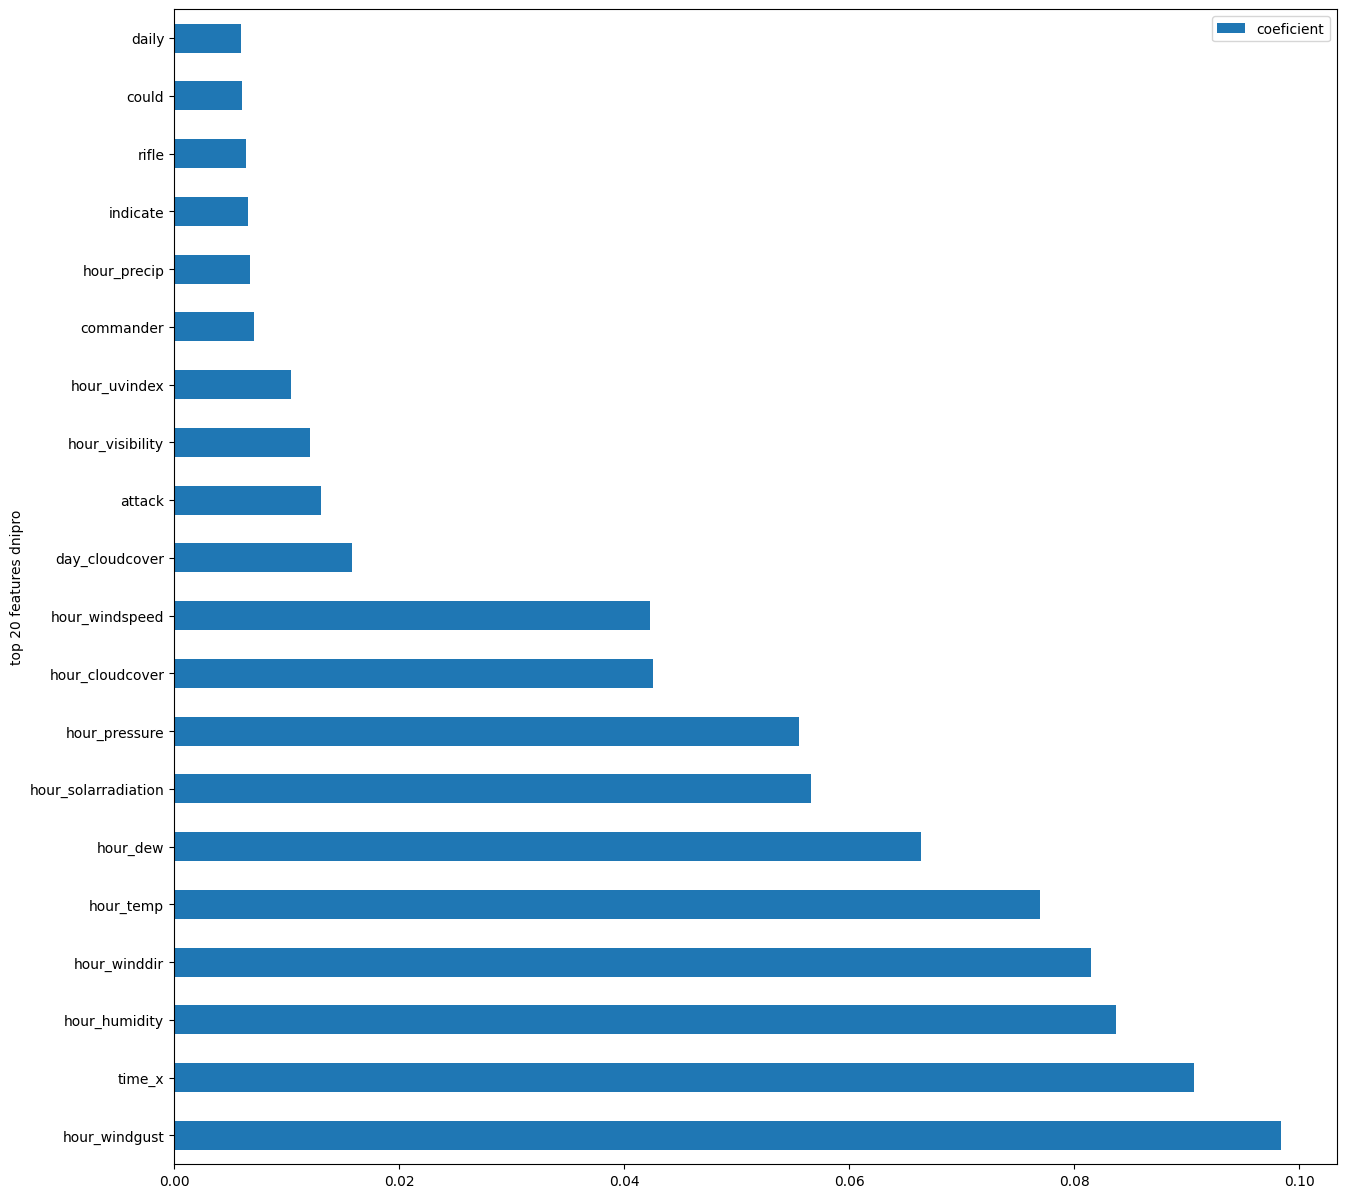

In [299]:
features_data = pd.DataFrame({'top 20 features dnipro': [features_names[i] for i in coef_indexes],
                             'coeficient': [coeficients[i] for i in coef_indexes]})
features_data.set_index('top 20 features dnipro', inplace=True)
features_data.plot.barh(figsize=(15,15))

In [300]:
lutsk_data = pd.read_csv('reg3_lutsk.csv')
lutsk_data.head()

,Unnamed: 0,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_snow,day_windgust,...,alarm,datetime_combined,date,time,day_of_week,alarm_last_2hours,alarm_last_3hours,alarm_last_4hours,alarm_in_lviv,alarm_in_rivne
0,0,4.9,0.7,2.6,0.0,83.7,0.118,4.17,0.1,32.4,...,0.0,2022-02-24 00:00:00,2022-02-24,0.0,3.0,0.0,0.0,0.0,0.0,0.0
1,1,4.9,0.7,2.6,0.0,83.7,0.118,4.17,0.1,32.4,...,0.0,2022-02-24 01:00:00,2022-02-24,1.0,3.0,0.0,0.0,0.0,0.0,0.0
2,2,4.9,0.7,2.6,0.0,83.7,0.118,4.17,0.1,32.4,...,0.0,2022-02-24 02:00:00,2022-02-24,2.0,3.0,0.0,0.0,0.0,0.0,0.0
3,3,4.9,0.7,2.6,0.0,83.7,0.118,4.17,0.1,32.4,...,0.0,2022-02-24 03:00:00,2022-02-24,3.0,3.0,0.0,0.0,0.0,0.0,0.0
4,4,4.9,0.7,2.6,0.0,83.7,0.118,4.17,0.1,32.4,...,0.0,2022-02-24 04:00:00,2022-02-24,4.0,3.0,0.0,0.0,0.0,0.0,0.0


In [301]:
train_lutsk = pd.merge(lutsk_data, tfidf_data, on='date', how='inner')

In [302]:
train_lutsk['date'] = pd.to_datetime(train_lutsk['datetime_combined'])
train_lutsk.set_index('datetime_combined', inplace=True)
train_lutsk.head()

,Unnamed: 0,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_snow,day_windgust,...,west,western,withdraw,withdrawal,within,without,would,zaporizhia,zaporizhzhia,znpp
datetime_combined,,,,,,,,,,,,,,,,,,,,,
2022-02-24 00:00:00,0,4.9,0.7,2.6,0.0,83.7,0.118,4.17,0.1,32.4,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0
2022-02-24 01:00:00,1,4.9,0.7,2.6,0.0,83.7,0.118,4.17,0.1,32.4,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0
2022-02-24 02:00:00,2,4.9,0.7,2.6,0.0,83.7,0.118,4.17,0.1,32.4,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0
2022-02-24 03:00:00,3,4.9,0.7,2.6,0.0,83.7,0.118,4.17,0.1,32.4,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0
2022-02-24 04:00:00,4,4.9,0.7,2.6,0.0,83.7,0.118,4.17,0.1,32.4,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0


In [303]:
columns_delete = ['Unnamed: 0', 'region_id_x', 'tf-idf', 'date', 'alarm_last_2hours', 'alarm_last_3hours', 'alarm_last_4hours', 'alarm_in_lviv', 'alarm_in_rivne']
train_lutsk.drop(columns=columns_delete, inplace=True)

In [304]:
X = train_lutsk.drop(columns=['alarm'])
y = train_lutsk['alarm']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf_lutsk = clf.fit(X_train, y_train)
y_pred = clf_lutsk.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.864957264957265


In [305]:
target_names = ['alert', 'no alert']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       alert       0.92      0.93      0.92      2062
    no alert       0.43      0.39      0.41       278

    accuracy                           0.86      2340
   macro avg       0.67      0.66      0.67      2340
weighted avg       0.86      0.86      0.86      2340



In [306]:
train_lutsk_without_alert = train_lutsk.drop(columns=['alarm'])
coeficients = clf_lutsk.feature_importances_
coef_indexes = np.argsort(np.abs(coeficients))[::-1][:20]
features_names = train_lutsk_without_alert.columns.tolist()

<Axes: ylabel='top 20 features lutsk'>

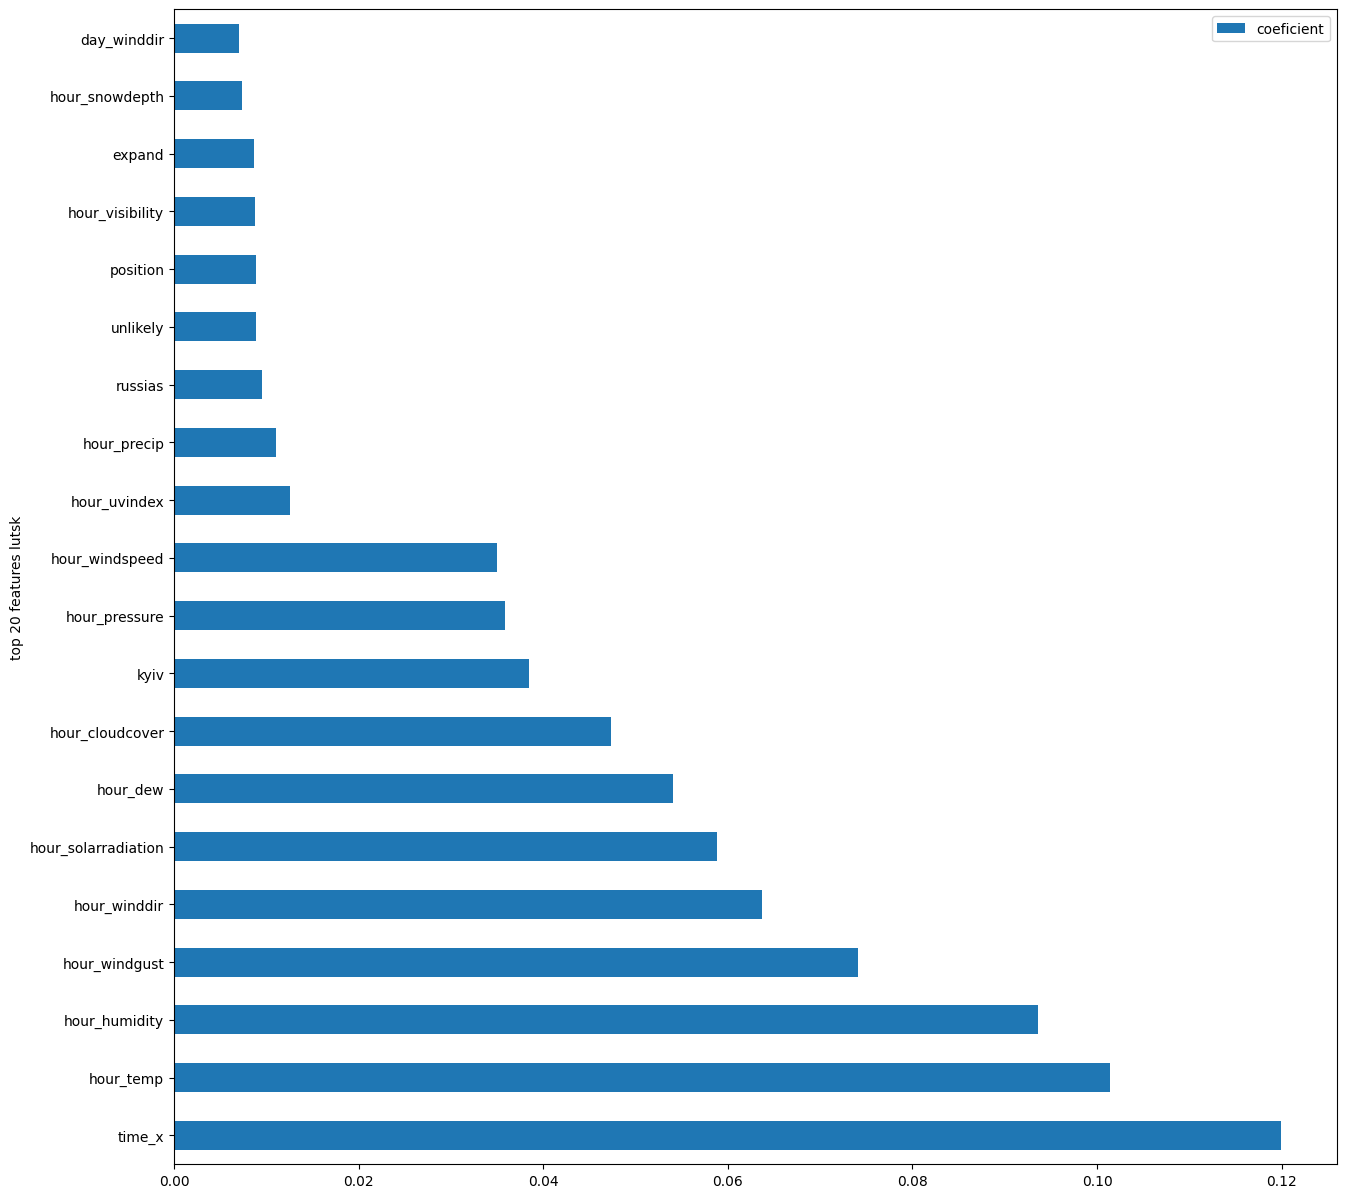

In [307]:
features_data = pd.DataFrame({'top 20 features lutsk': [features_names[i] for i in coef_indexes],
                             'coeficient': [coeficients[i] for i in coef_indexes]})
features_data.set_index('top 20 features lutsk', inplace=True)
features_data.plot.barh(figsize=(15,15))

In [308]:
vinnytsia_data = pd.read_csv('reg2_vinnytsia.csv')
vinnytsia_data.head()

,Unnamed: 0,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_snow,day_windgust,...,alarm_last_2hours,alarm_last_3hours,alarm_last_4hours,alarm_in_zhytomyr,alarm_in_kyiv,alarm_in_kropyvnytskyi,alarm_in_odesa,alarm_in_khmelnytskyi,alarm_in_cherkasy,alarm_in_chernivtsi
0,0,4.9,0.7,2.6,0.0,83.7,0.118,4.17,0.1,32.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,4.9,0.7,2.6,0.0,83.7,0.118,4.17,0.1,32.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,4.9,0.7,2.6,0.0,83.7,0.118,4.17,0.1,32.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,4.9,0.7,2.6,0.0,83.7,0.118,4.17,0.1,32.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,4.9,0.7,2.6,0.0,83.7,0.118,4.17,0.1,32.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [309]:
train_vinnytsia = pd.merge(vinnytsia_data, tfidf_data, on='date', how='inner')

In [310]:
train_vinnytsia['date'] = pd.to_datetime(train_vinnytsia['datetime_combined'])
train_vinnytsia.set_index('datetime_combined', inplace=True)
train_vinnytsia.head()

,Unnamed: 0,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_snow,day_windgust,...,west,western,withdraw,withdrawal,within,without,would,zaporizhia,zaporizhzhia,znpp
datetime_combined,,,,,,,,,,,,,,,,,,,,,
2022-02-24 00:00:00,0,4.9,0.7,2.6,0.0,83.7,0.118,4.17,0.1,32.4,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0
2022-02-24 01:00:00,1,4.9,0.7,2.6,0.0,83.7,0.118,4.17,0.1,32.4,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0
2022-02-24 02:00:00,2,4.9,0.7,2.6,0.0,83.7,0.118,4.17,0.1,32.4,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0
2022-02-24 03:00:00,3,4.9,0.7,2.6,0.0,83.7,0.118,4.17,0.1,32.4,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0
2022-02-24 04:00:00,4,4.9,0.7,2.6,0.0,83.7,0.118,4.17,0.1,32.4,...,0.031219,0.066306,0.0,0.020069,0.0,0.0,0.012225,0.0,0.0,0.0


In [311]:
columns_delete = ['Unnamed: 0', 'region_id_x', 'tf-idf', 'date', 'alarm_last_2hours', 'alarm_last_3hours', 'alarm_last_4hours', 'alarm_in_zhytomyr', 'alarm_in_kyiv', 'alarm_in_kropyvnytskyi', 'alarm_in_odesa', 'alarm_in_khmelnytskyi', 'alarm_in_cherkasy', 'alarm_in_chernivtsi']
train_vinnytsia.drop(columns=columns_delete, inplace=True)

In [312]:
X = train_vinnytsia.drop(columns=['alarm'])
y = train_vinnytsia['alarm']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf_vinnytsia = clf.fit(X_train, y_train)
y_pred = clf_vinnytsia.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8700854700854701


In [313]:
target_names = ['alert', 'no alert']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       alert       0.92      0.93      0.93      2062
    no alert       0.45      0.41      0.43       278

    accuracy                           0.87      2340
   macro avg       0.69      0.67      0.68      2340
weighted avg       0.87      0.87      0.87      2340



In [314]:
train_vinnytsia_without_alert = train_vinnytsia.drop(columns=['alarm'])
coeficients = clf_vinnytsia.feature_importances_
coef_indexes = np.argsort(np.abs(coeficients))[::-1][:20]
features_names = train_vinnytsia_without_alert.columns.tolist()

<Axes: ylabel='top 20 features vinnytsia'>

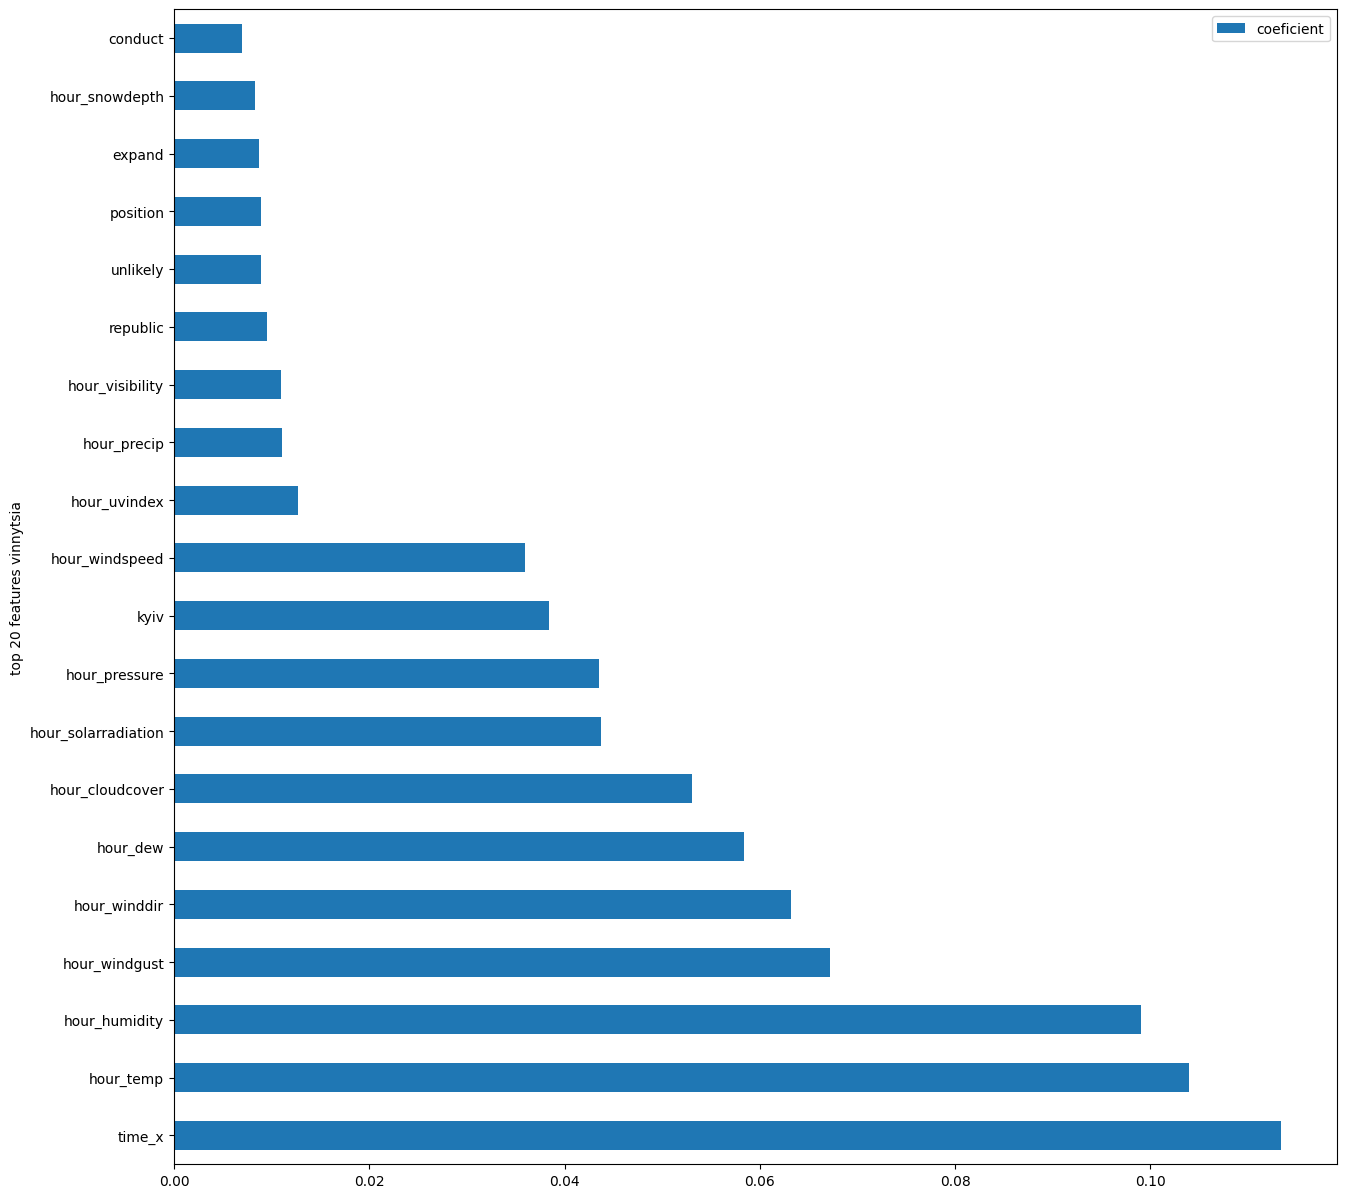

In [315]:
features_data = pd.DataFrame({'top 20 features vinnytsia': [features_names[i] for i in coef_indexes],
                             'coeficient': [coeficients[i] for i in coef_indexes]})
features_data.set_index('top 20 features vinnytsia', inplace=True)
features_data.plot.barh(figsize=(15,15))